# DSA 8203 - Principles of Data science

### Name: Sharon Owino     
### Reg. No: 166419

![Alt text](https://www.exquisitecoasts.com/images/Italy-Coastal-Destinations.jpg)

**Title:**   
## Sentiment Analysis on Italian Hotel Reviews



### Introduction

Hotel reviews provide important feedback in the hospitality industry, highlighting areas for improvement and showcasing a hotel's strengths. The Hospitality Industry has the potential to be a $4.7 Trillion Industry as described by Forbes.

The value of hotel reviews is immense to management, staff, and potential guests who can use the analysis of this review data to derive valuable insights to have a deeper understanding of hotel performance beyond traditional metrics like ratings, cleanliness, and amenities.

### Background

Sentiment analysis is a technique that identifies the emotional tone of text, such as hotel reviews, by categorizing feedback as positive or negative. This method enables hotels to quickly summarize large volumes of customer opinions, providing valuable insights into satisfaction levels and areas for improvement.

By systematically evaluating these sentiments, hotel managers can identify trends, strengths, and underlying issues, empowering them to make data-driven decisions that enhance guest experiences and service quality.

The project follows the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** framework, which consists of the following phases:

#![Image](https://th.bing.com/th/id/R.a673361c59cedf2e8cfaa1f7ee8f5c23?rik=Zhc9sNg7zg5dTQ&pid=ImgRaw&r=0)

1. **Business Understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Modeling**
5. **Evaluation**
6. **Deployment**

Objectives and Goals

**Objective:**

1. Analyze customer reviews to understand sentiment and its relationship with ratings.
2. Identify factors that influence customer satisfaction based on reviews and ratings.
3. Provide actionable insights to improve hotel services and customer experience.

**Goals:**
1. Determine the correlation between *'Rating'* and *'Sentiment'*.
2. Identify trends in customer sentiment across different hotels.
3. Analyze the length of reviews in relation to sentiment and ratings.
4. Provide recommendations for hotel management based on the analysis.

### 1. **Data Collection and Preparation**

**About Dataset**

This dataset contains a comprehensive collection of scraped comments from Italian users on the popular travel website, TripAdvisor. It serves as a valuable resource for natural language processing (NLP) and sentiment analysis tasks in the Italian language.

The dataset encompasses a wide range of reviews covering various travel destinations in italy, germany and USA of italian travellers. Each comment entry includes the review text, the associated rating, and additional metadata such as the reviewer's username and the date of posting.

**Data description**   
Variable description

The dataset contains 20k italian's comment scraped. The data frame is composed by 5 features:

* comment : the entire comment.
* title : the description of the comment.
* stars : the review score.
* name: the article writer name.
* date: when the comment was written.

The dataset is collected in a structured format, ensuring ease of use for data analysis and machine learning tasks. It can be utilized to train and evaluate models for sentiment classification, topic modeling, text summarization, and more.


   - **Data Preprocessing**: Clean and prepare the text data ensuring that there are no missing values, outliers, and inconsistencies in the data. Normalize numerical features and handle categorical variables where needed.
   Use spaCy to remove stopwords, punctuation, and special characters, then tokenize the text into words or sentences, and perform lemmatization to reduce words to their base forms.
   - **Feature Engineering**: Create features like "month" (from dates) or "region" (from destinations) to enhance model performance.
   
### 2. **Exploratory Data Analysis (EDA)**
   - **Distribution Analysis**:Analyze the distribution of ratings, review lengths, and sentiment over time.
   - **Visualization**:Use tools like Matplotlib, Seaborn, and Plotly to visualize trends, seasonality, and regional differences.
   - **Key Insights**:Identify patterns such as price spikes, seasonal trends, or correlations between review length and ratings.

### 3. **Modeling**
   - **Sentiment Analysis**: Analyze sentiment using a pre-trained model or build a custom model by using pre-trained models like BERT (Italian-specific) for sentiment classification.

### 4. **Investigations to Conduct**
**Sentiment Analysis:** Investigate how sentiment (positive, negative, neutral) correlates with ratings.           
**Review Length Analysis:** Explore whether longer reviews tend to have higher or lower ratings and how they relate to sentiment.              
**Hotel Comparison:** Compare sentiment and ratings across different hotels to identify strengths and weaknesses.             
**Trend Analysis:** Analyze trends over time if the dataset includes timestamps (e.g., do ratings improve or decline over time?).

### 1. Dataset Preparation

Let's start by loading the dataset and getting a brief overview of its contents.

In [ ]:
# open in a dataFrame
import pandas as pd
import numpy as np
import requests

# Disable warnings
import warnings
warnings.filterwarnings('ignore')


# Install Plotly
!pip install plotly

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
# Load dataset
url = 'https://drive.google.com/uc?id=1ET-mdAZ9zLU8UuVWeFrH8Rzr8pZHVVue'
response = requests.get(url)
with open('llm_df.csv', 'wb') as file:
    file.write(response.content)

# Load the dataset
data = pd.read_csv('llm_df.csv')

# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0                                            comment  \
0           0  Questo è stato un interessante e piena di sera...   
1           1  Ottimo e ben organizzato. Nessuna coda all'ent...   
2           2  Ci siamo stati molto spesso con gli amici o da...   
3           3  Consiglio di visitare il Duomo di Milano ....e...   
4           4  La vista del duomo all'uscita della metro ti t...   

                          title               date              name  stars  
0         Zona del canal grande    26 ottobre 2016           gfdmmad    5.0  
1             Visita di piacere     26 aprile 2019  Diabolik-Eva-014    5.0  
2            Da vedere a Milano   18 novembre 2018     O5262KGchrisd    5.0  
3  Il Duomo sempre affascinante      7 agosto 2019         Babellina    5.0  
4                   Eccezionale    9 dicembre 2019            Nik804    5.0  


### 2. Data Cleaning

In [ ]:
# Create a mapping of Italian month names to month numbers
month_mapping = {
    'gennaio': '01',
    'febbraio': '02',
    'marzo': '03',
    'aprile': '04',
    'maggio': '05',
    'giugno': '06',
    'luglio': '07',
    'agosto': '08',
    'settembre': '09',
    'ottobre': '10',
    'novembre': '11',
    'dicembre': '12'
}

# Replace Italian month names with numbers
for italian_month, month_number in month_mapping.items():
    data['date'] = data['date'].str.replace(italian_month, month_number)

# Now parse the date and format the date as DD/MM/YYYY
data['formatted_date'] = data['date'].str.replace(r'(\d{1,2}) (\d{2}) (\d{4})', r'\1-\2-\3', regex=True)

#print data
data.head()

Unnamed: 0                                            comment  \
0           0  Questo è stato un interessante e piena di sera...   
1           1  Ottimo e ben organizzato. Nessuna coda all'ent...   
2           2  Ci siamo stati molto spesso con gli amici o da...   
3           3  Consiglio di visitare il Duomo di Milano ....e...   
4           4  La vista del duomo all'uscita della metro ti t...   

                          title         date              name  stars  \
0         Zona del canal grande   26 10 2016           gfdmmad    5.0   
1             Visita di piacere   26 04 2019  Diabolik-Eva-014    5.0   
2            Da vedere a Milano   18 11 2018     O5262KGchrisd    5.0   
3  Il Duomo sempre affascinante    7 08 2019         Babellina    5.0   
4                   Eccezionale    9 12 2019            Nik804    5.0   

  formatted_date  
0     26-10-2016  
1     26-04-2019  
2     18-11-2018  
3      7-08-2019  
4      9-12-2019

In [ ]:
data['formatted_date'][0]

' 26-10-2016'

In [ ]:
# Drop the original date columns
data.drop(columns=['date'], inplace=True)
data.head()

Unnamed: 0                                            comment  \
0           0  Questo è stato un interessante e piena di sera...   
1           1  Ottimo e ben organizzato. Nessuna coda all'ent...   
2           2  Ci siamo stati molto spesso con gli amici o da...   
3           3  Consiglio di visitare il Duomo di Milano ....e...   
4           4  La vista del duomo all'uscita della metro ti t...   

                          title              name  stars formatted_date  
0         Zona del canal grande           gfdmmad    5.0     26-10-2016  
1             Visita di piacere  Diabolik-Eva-014    5.0     26-04-2019  
2            Da vedere a Milano     O5262KGchrisd    5.0     18-11-2018  
3  Il Duomo sempre affascinante         Babellina    5.0      7-08-2019  
4                   Eccezionale            Nik804    5.0      9-12-2019

In [ ]:
# set the date_time column as the index
data.set_index('formatted_date', inplace=True)
data.head()

Unnamed: 0                                            comment  \
formatted_date                                                                  
26-10-2016               0  Questo è stato un interessante e piena di sera...   
26-04-2019               1  Ottimo e ben organizzato. Nessuna coda all'ent...   
18-11-2018               2  Ci siamo stati molto spesso con gli amici o da...   
7-08-2019                3  Consiglio di visitare il Duomo di Milano ....e...   
9-12-2019                4  La vista del duomo all'uscita della metro ti t...   

                                       title              name  stars  
formatted_date                                                         
26-10-2016             Zona del canal grande           gfdmmad    5.0  
26-04-2019                 Visita di piacere  Diabolik-Eva-014    5.0  
18-11-2018                Da vedere a Milano     O5262KGchrisd    5.0  
7-08-2019       Il Duomo sempre affascinante         Babellina    5.0  
9-12-2019                        Eccezionale            Nik804    5.0

### 3. Data Preprocessing

Before diving into the analysis, it's important to clean and preprocess the data to ensure accurate and meaningful results. We will handle missing values, remove irrelevant columns, and perform any necessary transformations.

In [ ]:
data.rename(columns={'title': 'Hotel', 'comment': 'Review', 'stars': 'Rating'}, inplace=True)
data.head()

Unnamed: 0                                             Review  \
formatted_date                                                                  
26-10-2016               0  Questo è stato un interessante e piena di sera...   
26-04-2019               1  Ottimo e ben organizzato. Nessuna coda all'ent...   
18-11-2018               2  Ci siamo stati molto spesso con gli amici o da...   
7-08-2019                3  Consiglio di visitare il Duomo di Milano ....e...   
9-12-2019                4  La vista del duomo all'uscita della metro ti t...   

                                       Hotel              name  Rating  
formatted_date                                                          
26-10-2016             Zona del canal grande           gfdmmad     5.0  
26-04-2019                 Visita di piacere  Diabolik-Eva-014     5.0  
18-11-2018                Da vedere a Milano     O5262KGchrisd     5.0  
7-08-2019       Il Duomo sempre affascinante         Babellina     5.0  
9-12-2019                        Eccezionale            Nik804     5.0

In [ ]:
# Drop ID in place
data.drop(columns=['Unnamed: 0','name'], axis=1, inplace=True)

In [ ]:
# Get the size of the data
data.size

60174

In [ ]:
# Get number of rows and columns
data.shape

(20058, 3)

In [ ]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries,  26-10-2016 to  18-11-2016
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20058 non-null  object 
 1   Hotel   20058 non-null  object 
 2   Rating  20058 non-null  float64
dtypes: float64(1), object(2)
memory usage: 626.8+ KB


In [ ]:
# Get data types of columns
data.dtypes

Review     object
Hotel      object
Rating    float64
dtype: object

In [ ]:
# Check for duplicated rows across all columns
duplicates = data[data.duplicated(keep=False)]

print("\nDuplicated Rows:")
duplicates


Duplicated Rows:


Review  \
formatted_date                                                      
21-01-2020      Visitato con escursione organizzata da viviber...   
21-01-2020      Visitato con escursione organizzata da viviber...   

                               Hotel  Rating  
formatted_date                                
21-01-2020      Tre giorni a berlino     5.0  
21-01-2020      Tre giorni a berlino     5.0

In [ ]:
# Drop duplicates in place, keeping the first occurrence
data = data.drop_duplicates(keep='first')

# Display the DataFrame after removing duplicates in place
print("\nDataFrame after removing duplicates in place:")
print(data)
print("\nDataFrame shape after removing duplicates in place:")

data.duplicated()
data.shape


DataFrame after removing duplicates in place:
                                                           Review  \
formatted_date                                                      
26-10-2016      Questo è stato un interessante e piena di sera...   
26-04-2019      Ottimo e ben organizzato. Nessuna coda all'ent...   
18-11-2018      Ci siamo stati molto spesso con gli amici o da...   
7-08-2019       Consiglio di visitare il Duomo di Milano ....e...   
9-12-2019       La vista del duomo all'uscita della metro ti t...   
...                                                           ...   
3-10-2015       Un bel parco in mezzo ad una delle città più g...   
1-01-2020       Abbiamo passeggiato, bellissimi i riflessi del...   
18-10-2017      Che dire? Non manca proprio nulla: da Beato An...   
23-09-2019      Spettacolare Porta simbolo della città di Berl...   
18-11-2016      La darsena con le varie biforcazioni così come...   

                                                       

(20057, 3)

In [ ]:
# Check for duplicates

data.duplicated().sum()


0

### Check for Descriptive Statistic

In [ ]:
# Generate basic descriptive stats
data.describe().T

count      mean       std  min  25%  50%  75%  max
Rating  20057.0  4.636137  0.681269  1.0  4.0  5.0  5.0  5.0

###  Check Missing Values

In [ ]:
mask=data.isnull()
mask.head(n=5)

Review  Hotel  Rating
formatted_date                       
26-10-2016       False  False   False
26-04-2019       False  False   False
18-11-2018       False  False   False
7-08-2019        False  False   False
9-12-2019        False  False   False

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Review    0
Hotel     0
Rating    0
dtype: int64


In [ ]:
## we can get the number of non-missing values by column
data.count()

Review    20057
Hotel     20057
Rating    20057
dtype: int64

In [ ]:
data['Rating'].value_counts()

Rating
5.0    14492
4.0     4306
3.0      911
2.0      222
1.0      126
Name: count, dtype: int64

In [ ]:
# Check unique categories in `Review`
data['Review'].nunique()

20056

In [ ]:
# show descriptives for object data

data.describe(include=[object])

Review       Hotel
count                                               20057       20057
unique                                              20056       13605
top     Siamo passati presso questo monumento spinti d...  Bellissimo
freq                                                    2         210

In [ ]:
# no of times a hotel has been mentioned
data['Hotel'].value_counts()

Hotel
Bellissimo                                                           210
Da vedere                                                            159
Da non perdere                                                       152
Meraviglioso                                                         114
Fantastico                                                           102
                                                                    ... 
Bellissimo posto                                                       1
Museo ENORME ma unico al mondo!                                        1
un concentrato di bellezza                                             1
Per non dimenticare ...!                                               1
Fantastico angolo di Milano che assolutamente non si deve perdere      1
Name: count, Length: 13605, dtype: int64

In [ ]:
data.sort_values(by=['Review'],ascending=False, inplace=True)
data.head(10)

Review  \
formatted_date                                                      
30-03-2017      🔝 bellissimo! Anche con La pioggia! Tanti scor...   
27-07-2022      … come scrive la mia guida, a ragione. Ma è an...   
30-09-2018      “Il museo è uno dei luoghi che danno l'idea pi...   
20-05-2018      “I Navigli non sono un luna park”: la scritta ...   
2-05-2019       é un parco meraviglioso. In bici o a piedi si ...   
1-07-2013       é un monastero bellissimo che passa inosservat...   
10-05-2017      é sempre uno spettacolo ed è sempre molto ello...   
15-10-2019      é interessante come oggi i tedeschi propongono...   
14-06-2016      é davvero il polmone verde di Manhattan, molto...   
14-01-2016      é d'obbligo andarci se si è a new york! se lo ...   

                                                            Hotel  Rating  
formatted_date                                                             
30-03-2017                                 Uno spettacolo a NYC!      5.0  
27-07-2022       Probabilmente la migliore pinacoteca del mondo …     5.0  
30-09-2018                               Un viaggio meraviglioso      5.0  
20-05-2018                                Valgono una passeggiata     3.0  
2-05-2019                                     Pace e divertimento     5.0  
1-07-2013                                               Da vedere     5.0  
10-05-2017       Come si fa a non dare il massimo a Central Park?     5.0  
15-10-2019      Mostra fotografica e video della distruzione d...     3.0  
14-06-2016                                             Bellissimo     5.0  
14-01-2016                       il rettangolo verde di New York!     5.0

In [ ]:
# group Hotels with the dates
data.sort_values(by=['Hotel', 'formatted_date'], ascending=[True, True], inplace=True)
data.head(10)

Review  \
formatted_date                                                      
16-05-2019      Sono entrata per caso in questa chiesa. E’ mer...   
7-02-2021       Bellissimo fuori, un po' scuro dentro dato dal...   
8-10-2019       Gran bel trionfo di fasti reali! Belle sale co...   
22-06-2017      Bella struttura molto appariscente. Bella piaz...   
14-08-2017      È indubbiamente un museo che merita di essere ...   
25-07-2016      Affreschi cinquecenteschi di scuola leonardesc...   
9-03-2020       Se visitate Berlino dovete sicuramente passarc...   
29-08-2018      Siamo stati portati da amici Berlinesi a veder...   
21-08-2019      Il muro di Berlino, sentito nominare ogni gior...   
26-04-2017      Al memoriale si accede facilmente arrivando al...   

                                                Hotel  Rating  
formatted_date                                                 
16-05-2019                                 Bellissima     5.0  
7-02-2021                                 Bellissimo      4.0  
8-10-2019                                 Bellissimo      5.0  
22-06-2017                Bello e sempre spettacolare     4.0  
14-08-2017                     Bene ma non benissimo      3.0  
25-07-2016                            Da non perdere      5.0  
9-03-2020        Luogo raccolto nel mezzo della città     5.0  
29-08-2018                       Muro a cielo aperto      4.0  
21-08-2019                          Non entusiasmante     3.0  
26-04-2017                          Risveglia i sensi     4.0

In [ ]:
data.groupby(['Review', 'Hotel']).count()[['Rating']]

Rating
Review                                             Hotel                                                   
                   Uno dei quartieri più belli ... Da sognare!!!                                          1
 A fianco della Chiesa di San Maurizio vi è pur... La Chiesa nella Chiesa                                 1
 Assolutamente irrinunciabile se visiti New Yor... Impossibile non visitarlo..                            1
 Bellissima esperienza. Suggestiva "foresta" ne... Un bosco nella metropoli                               1
 Che dire ...un parco ...bello , grande, pieno ... Verde a Manhattan                                      1
...                                                                                                     ...
é un parco meraviglioso. In bici o a piedi si g... Pace e divertimento                                    1
“I Navigli non sono un luna park”: la scritta c... Valgono una passeggiata                                1
“Il museo è uno dei luoghi che danno l'idea più... Un viaggio meraviglioso                                1
… come scrive la mia guida, a ragione. Ma è anc... Probabilmente la migliore pinacoteca del mondo …       1
🔝 bellissimo! Anche con La pioggia! Tanti scorc... Uno spettacolo a NYC!                                  1

[20057 rows x 1 columns]

In [ ]:
data.groupby(['Rating', 'Hotel']).count()[['Review']]

Review
Rating Hotel                                           
1.0    A che serve l'orario della prenotazione?       1
       Accalappia turisti                             1
       Assolutamente no                               1
       Atmosfera natalizia                            1
       Bello.                                         1
...                                                 ...
5.0    🕍🔝                                             1
       😍                                              2
       😍 Eccellenza                                   1
       😍😍😍                                            1
       😔😔😔Bellissimo                                  1

[14353 rows x 1 columns]

Let's preprocess and tokenize this Italian hotel review dataset using transfer learning with a pre-trained BERT model. This approach allows us to leverage the power of transfer learning to improve sentiment analysis or other NLP tasks on your dataset. Adjust the preprocessing and model parameters based on your specific requirements and dataset characteristics.

Prepare the Data for the Model: Use the Hugging Face transformers library to tokenize the text and prepare it for the model.

In [ ]:
from transformers import BertTokenizer

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-italian-uncased')

# Tokenize the reviews
tokens = tokenizer(
    data['Review'].tolist(),
    padding=True,
    truncation=True,
    max_length=128,  # Adjust based on your needs
    return_tensors='pt'  # Return PyTorch tensors
)

input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/243k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

In [ ]:
# Classify sentiment
from textblob import TextBlob

# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the Review column
data['Sentiment'] = data['Review'].apply(classify_sentiment_textblob)

# Display the DataFrame with sentiments
print(data)

                                                           Review  \
formatted_date                                                      
16-05-2019      Sono entrata per caso in questa chiesa. E’ mer...   
7-02-2021       Bellissimo fuori, un po' scuro dentro dato dal...   
8-10-2019       Gran bel trionfo di fasti reali! Belle sale co...   
22-06-2017      Bella struttura molto appariscente. Bella piaz...   
14-08-2017      È indubbiamente un museo che merita di essere ...   
...                                                           ...   
7-10-2016       Una bellissima passeggiata immersa nel verde, ...   
21-05-2018      Capolavori in arte. Non puoi non entrare e non...   
11-05-2016      Sono stata ad Ottobre 2013, fantastico... Inna...   
12-10-2019      Ehh quando ero giovane io era cosi bello andar...   
23-01-2020      È stato una emozione che non so descrivere ave...   

                                       Hotel  Rating Sentiment  
formatted_date                       

In [ ]:
data.head()

Review  \
formatted_date                                                      
16-05-2019      Sono entrata per caso in questa chiesa. E’ mer...   
7-02-2021       Bellissimo fuori, un po' scuro dentro dato dal...   
8-10-2019       Gran bel trionfo di fasti reali! Belle sale co...   
22-06-2017      Bella struttura molto appariscente. Bella piaz...   
14-08-2017      È indubbiamente un museo che merita di essere ...   

                                       Hotel  Rating Sentiment  
formatted_date                                                  
16-05-2019                        Bellissima     5.0   Neutral  
7-02-2021                        Bellissimo      4.0   Neutral  
8-10-2019                        Bellissimo      5.0   Neutral  
22-06-2017       Bello e sempre spettacolare     4.0   Neutral  
14-08-2017            Bene ma non benissimo      3.0   Neutral

Sentiment Analysis Visualization      

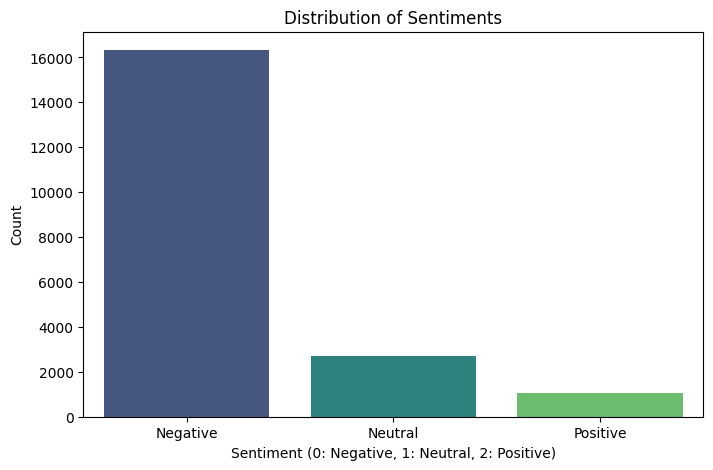

In [ ]:
# Bar chart showing the distribution of sentiments across different ratings.
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df['Sentiment'] is already created
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

In [ ]:
data.columns

Index(['Review', 'Hotel', 'Rating', 'Sentiment', 'Sentiment_Numeric'], dtype='object')

<Axes: title={'center': 'Rating'}, xlabel='Rating'>

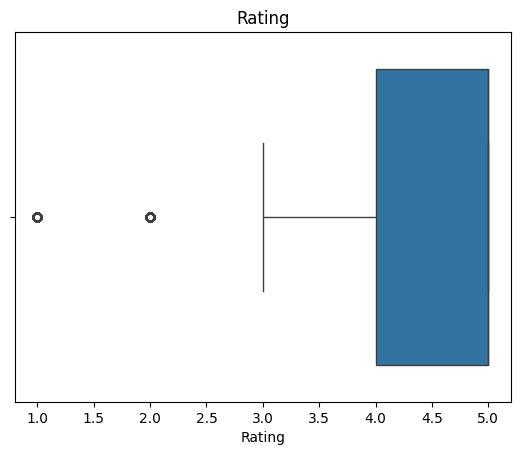

In [ ]:
# Create a boxplot to visualize distribution of Rating`
# plt.figure(figsize=(5, 1))
plt.title('Rating')
sns.boxplot(x=data['Rating'])

In [ ]:
import plotly.express as px

# Count occurrences of each rating
rating_counts = data['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Create a doughnut plot
fig = px.pie(rating_counts,
             values='Count',
             names='Rating',
             title='Distribution of Reviews by Ratings (1-5)',
             hole=0.4)  # This creates the doughnut shape

# Show the plot
fig.show()

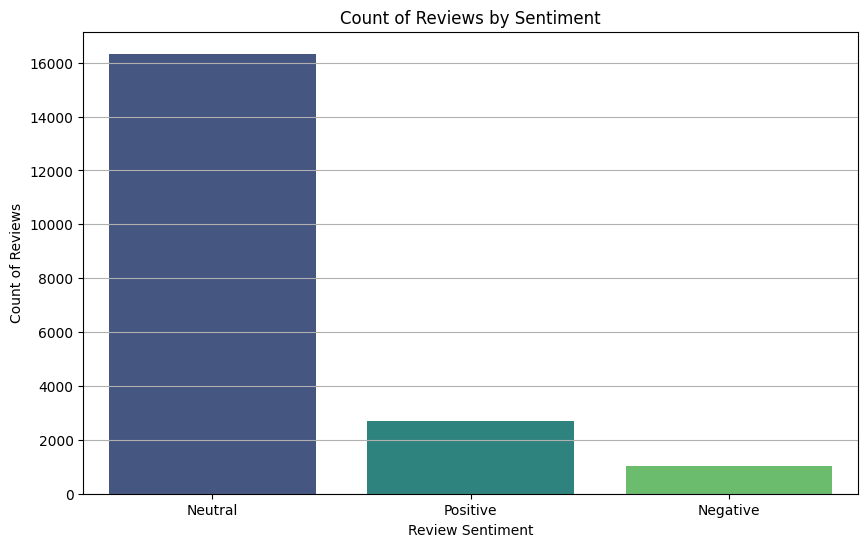

In [ ]:
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data, palette='viridis')

# Customize the plot
plt.title('Count of Reviews by Sentiment')
plt.ylabel('Count of Reviews')
plt.xlabel('Review Sentiment')
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
data.head()

Review  \
formatted_date                                                      
16-05-2019      Sono entrata per caso in questa chiesa. E’ mer...   
7-02-2021       Bellissimo fuori, un po' scuro dentro dato dal...   
8-10-2019       Gran bel trionfo di fasti reali! Belle sale co...   
22-06-2017      Bella struttura molto appariscente. Bella piaz...   
14-08-2017      È indubbiamente un museo che merita di essere ...   

                                       Hotel  Rating Sentiment  
formatted_date                                                  
16-05-2019                        Bellissima     5.0   Neutral  
7-02-2021                        Bellissimo      4.0   Neutral  
8-10-2019                        Bellissimo      5.0   Neutral  
22-06-2017       Bello e sempre spettacolare     4.0   Neutral  
14-08-2017            Bene ma non benissimo      3.0   Neutral

In [ ]:
# Map ratings to sentiment labels
#data['Sentiment_Rating'] = data['Rating'].apply(lambda x: 2 if x >= 4 else (1 if x == 3 else 0)) # Positive: Ratings of 4 and 5, Neutral: Ratings of 3 and Negative: Ratings of 1 and 2

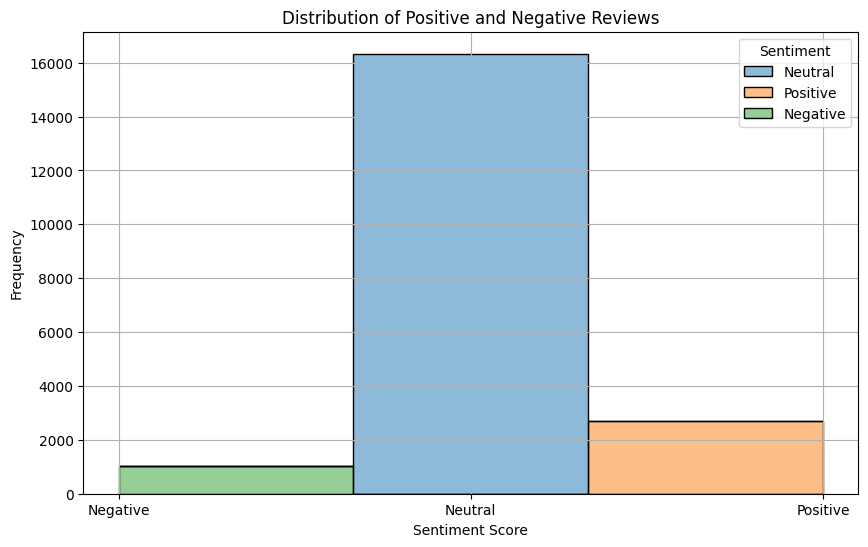

In [ ]:
# Create a numerical representation for the sentiment
data['Sentiment_Numeric'] = data['Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

# Filter out neutral reviews for the histogram
data_filtered = data[data['Sentiment'].isin(['Positive', 'Neutral', 'Negative'])]

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data_filtered, x='Sentiment_Numeric', hue='Sentiment', bins=3, kde=True, multiple='stack')
plt.title('Distribution of Positive and Negative Reviews')
plt.ylabel('Frequency')
plt.xlabel('Sentiment Score')
plt.xticks(ticks=[-1, 0, 1], labels=['Negative','Neutral', 'Positive'])
plt.grid(True)
plt.show()

In [ ]:
data.groupby(['Rating', 'Sentiment']).count()[['Sentiment_Numeric']]

Sentiment_Numeric
Rating Sentiment                   
1.0    Negative                  14
       Neutral                  101
       Positive                  11
2.0    Negative                  13
       Neutral                  180
       Positive                  29
3.0    Negative                  47
       Neutral                  751
       Positive                 113
4.0    Negative                 229
       Neutral                 3566
       Positive                 511
5.0    Negative                 737
       Neutral                11732
       Positive                2023

In [ ]:
# Grouping the data
grouped_data = data.groupby(['Rating', 'Sentiment']).count()[['Sentiment_Numeric']].reset_index()
grouped_data.columns = ['Rating', 'Sentiment', 'Count']

# Create an interactive histogram plot
fig = px.scatter(grouped_data,
                 x='Rating',
                 y='Count',
                 color='Sentiment',
                 #size='Count',
                 hover_name='Sentiment',
                 title='Scatter Plot of Ratings vs. Sentiment Count',
                 labels={'Count': 'Count of Sentiments', 'Rating': 'Hotel Rating'})

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Grouping the data
grouped_data = data.groupby(['Rating', 'Sentiment']).count()[['Sentiment_Numeric']].reset_index()

# Create an interactive bar plot
fig = px.bar(grouped_data,
             x='Rating',
             y='Sentiment_Numeric',
             color='Sentiment',
             barmode='group',
             title='Count of Reviews by Rating and Sentiment',
             labels={'Sentiment_Numeric': 'Count of Reviews', 'Rating': 'Hotel Rating'})

# Show the plot
fig.show()

In [ ]:
import plotly.express as px # import the library

# create histograms
fig_hist = px.histogram(data, x="Sentiment_Numeric",
                        title="Histogram of Sentiment_Numeric",
                        labels={"title": "Sentiment_Numeric"},
                        marginal="rug")
fig_hist.update_layout(barmode="overlay")
fig_hist.show()

In [ ]:
#!pip install plotly.express
import plotly.express as px # import the library

# create histograms
fig_hist = px.histogram(data, x="Rating",
                        title="Histogram of Rating",
                        labels={"title": "Rating"},
                        marginal="rug")
fig_hist.update_layout(barmode="overlay")
fig_hist.show()

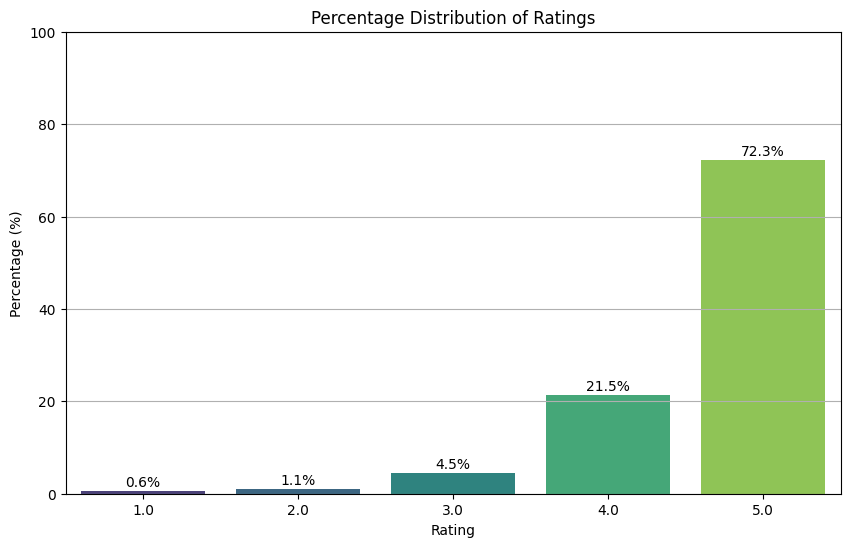

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of each rating
rating_counts = data['Rating'].value_counts(normalize=True) * 100
rating_counts = rating_counts.sort_index()  # Sort by rating value

# Create a bar plot for the percentage distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Percentage Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to 100%
for i, percentage in enumerate(rating_counts.values):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center')  # Add percentage labels
plt.grid(axis='y')
plt.show()

The percentage rating
* 5 = 72.3%
* 4 = 21.5%
* 3 = 4.5%
* 2 = 1.1%
* 1 = 0.6%

This percentages shows customer satisfation on the Hotels choose with 72.3% at 5 star rating and 0.6% Hotels at 1 star rating.

Review Length Analysis

In [ ]:
# Length of word in comment
data['Length'] = data['Review'].apply(len)
data.head()

Review  \
formatted_date                                                      
16-05-2019      Sono entrata per caso in questa chiesa. E’ mer...   
7-02-2021       Bellissimo fuori, un po' scuro dentro dato dal...   
8-10-2019       Gran bel trionfo di fasti reali! Belle sale co...   
22-06-2017      Bella struttura molto appariscente. Bella piaz...   
14-08-2017      È indubbiamente un museo che merita di essere ...   

                                       Hotel  Rating Sentiment  \
formatted_date                                                   
16-05-2019                        Bellissima     5.0   Neutral   
7-02-2021                        Bellissimo      4.0   Neutral   
8-10-2019                        Bellissimo      5.0   Neutral   
22-06-2017       Bello e sempre spettacolare     4.0   Neutral   
14-08-2017            Bene ma non benissimo      3.0   Neutral   

                Sentiment_Numeric  Length  
formatted_date                             
16-05-2019                      0     119  
7-02-2021                       0     146  
8-10-2019                       0     123  
22-06-2017                      0     134  
14-08-2017                      0     426

In [ ]:
data.groupby(['Sentiment_Numeric', 'Hotel']).count()[['Length']]

Length
Sentiment_Numeric Hotel                                      
-1                 Risveglia i sensi                        1
                  "Accademico ed Elegante"                  1
                  "SOLO PER VERI INTENDITORI DI ARTE"       1
                  "UNA FAVOLA"                              1
                  .... opera affascinante!                  1
...                                                       ...
 1                “Un’oasi di tranquillità”                 1
                  ♥️♥️♥️ Fantastico                         1
                  ❤️🔝🔝🔝❤️❤️❤️                               1
                  🇺🇸 passeggiata obbligatoria 🇺🇸            1
                  🔝                                         1

[14312 rows x 1 columns]

In [ ]:
data.groupby(['Sentiment_Numeric', 'Rating']).count()[['Length']]

Length
Sentiment_Numeric Rating        
-1                1.0         14
                  2.0         13
                  3.0         47
                  4.0        229
                  5.0        737
 0                1.0        101
                  2.0        180
                  3.0        751
                  4.0       3566
                  5.0      11732
 1                1.0         11
                  2.0         29
                  3.0        113
                  4.0        511
                  5.0       2023

<Axes: xlabel='Rating', ylabel='Length'>

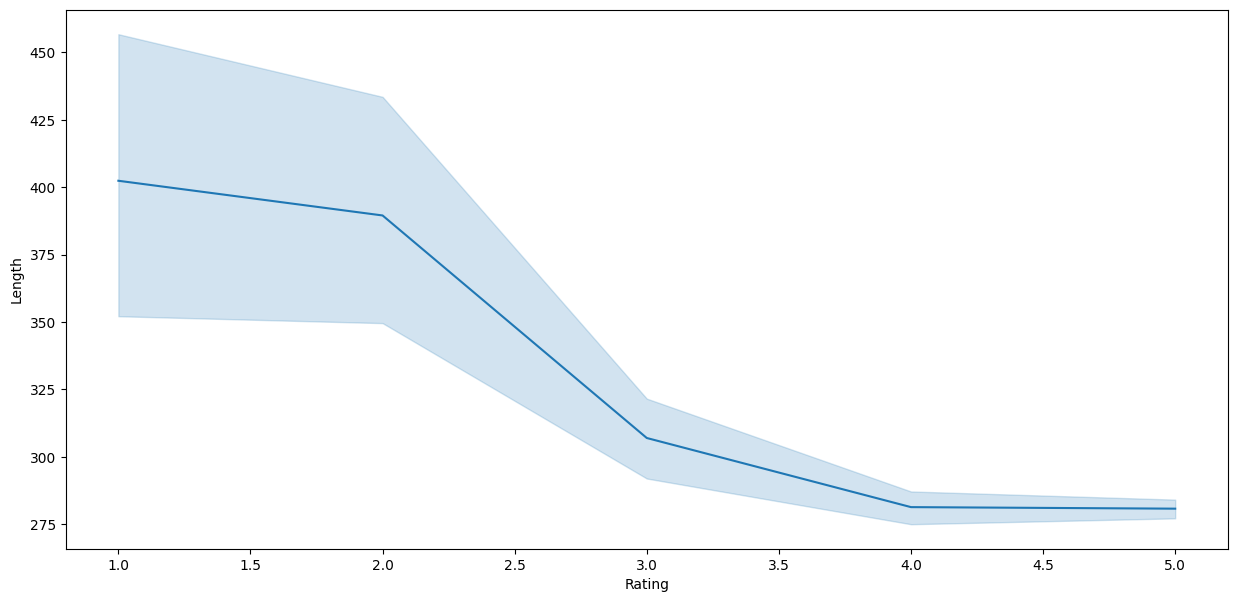

In [ ]:
# graph what the the relationship between Rating and Length of Review

plt.figure(figsize=(15,7))
sns.lineplot(data=data,x="Rating", y="Length")

The reletionship between Rating and Length of Review graph reveals that longer reviews tend to have lower ratings and shorter reviews tend to have higher ratings, showing that sentiment satisfied customers tend to leave short reviews.

In [ ]:
px.scatter(data,x="Rating",y="Length", color="Rating")

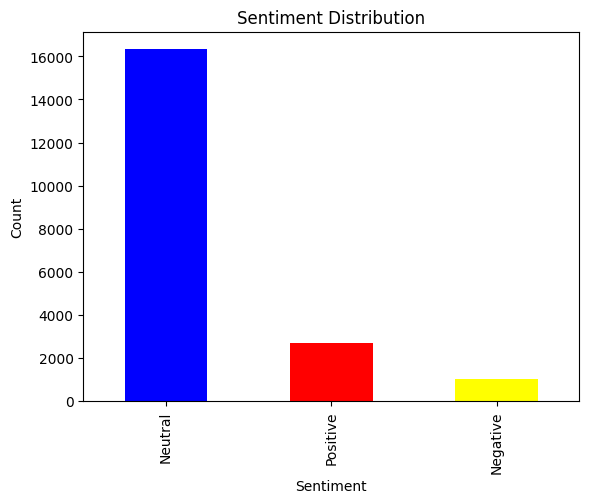

In [ ]:
# Analyzing the Results
import matplotlib.pyplot as plt

data['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'red', 'yellow'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Hotel Comparison

In [ ]:
# Group by hotel and calculate average sentiment and rating
hotel_comparison = data.groupby('Hotel').agg({'Sentiment': 'mean', 'Sentiment_Numeric': 'mean'}).reset_index()

hotel_comparison['Sentiment_Numeric_Size'] = hotel_comparison['Sentiment_Numeric'].apply(lambda x: 0 if x < 0 else x)

# Create an interactive scatter plot using Plotly
fig = px.scatter(hotel_comparison,
                 x='Sentiment_Numeric',
                 y='Sentiment',
                 color='Hotel',
                 size='Sentiment_Numeric_Size',  # Changed to 'Sentiment_Numeric_Size'
                 hover_name='Hotel',
                 title='Hotel Comparison: Sentiment_Numeric vs Sentiment',
                 labels={'Sentiment_Numeric': 'Average Sentiment_Numeric', 'Sentiment': 'Average Sentiment'},
                 size_max=20)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Average Rating',
    yaxis_title='Average Sentiment',
    legend_title='Hotel',
    xaxis_tickangle=-45
)

# Show the interactive plot
fig.show()

In [ ]:
# Group by hotel and calculate average sentiment and rating
hotel_comparison = data.groupby('Hotel').agg({'Sentiment': 'mean', 'Rating': 'mean'}).reset_index()

# Filter for hotels with an average rating greater than 3
hotel_comparison = hotel_comparison[hotel_comparison['Rating'] > 3]

# Create an interactive scatter plot using Plotly
fig = px.scatter(hotel_comparison,
                 x='Rating',
                 y='Sentiment',
                 title='Hotel Comparison: Average Ratings vs Sentiment',
                 labels={'Rating': 'Average Rating', 'Sentiment': 'Average Sentiment'},
                 color='Sentiment',
                 color_continuous_scale=px.colors.sequential.Viridis,
                 hover_name='Hotel',
                 size='Rating',  # Optional: size points based on average rating
                 size_max=20)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Average Rating',
    yaxis_title='Average Sentiment',
    legend_title='Average Sentiment',
    xaxis_tickangle=-45
)

# Show the interactive plot
fig.show()

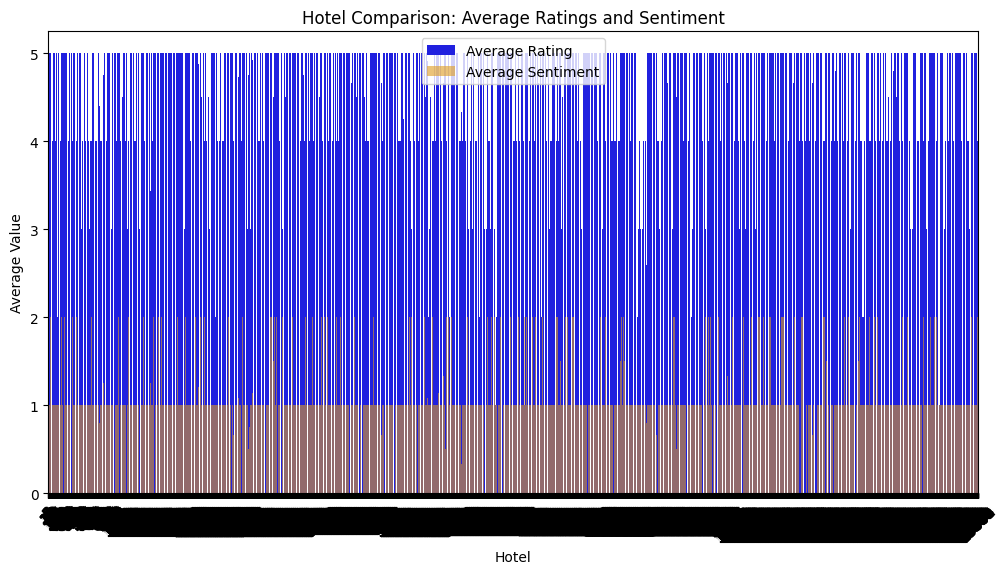

In [ ]:
# Group by hotel and calculate average sentiment and rating
hotel_comparison = data.groupby('Hotel').agg({'Sentiment': 'mean', 'Rating': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=hotel_comparison, x='Hotel', y='Rating', color='blue', label='Average Rating')
sns.barplot(data=hotel_comparison, x='Hotel', y='Sentiment', color='orange', label='Average Sentiment', alpha=0.6)
plt.title('Hotel Comparison: Average Ratings and Sentiment')
plt.xlabel('Hotel')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

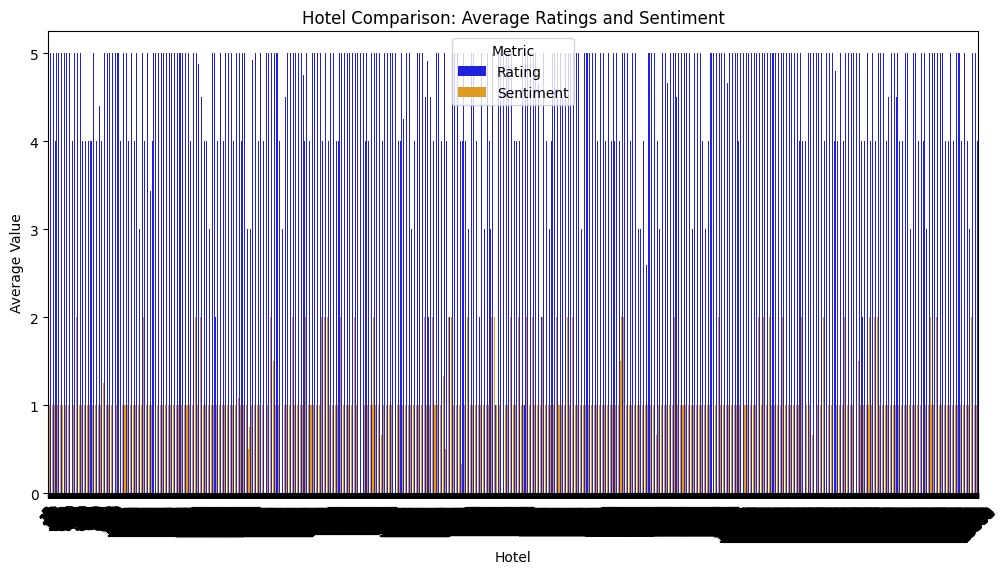

In [ ]:
# Group by hotel and calculate average sentiment and rating
hotel_comparison = data.groupby('Hotel').agg({'Sentiment': 'mean', 'Rating': 'mean'}).reset_index()

# Reshape the DataFrame to long format for Seaborn
hotel_comparison_melted = hotel_comparison.melt(id_vars='Hotel', value_vars=['Rating', 'Sentiment'],
                                                 var_name='Metric', value_name='Average Value')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=hotel_comparison_melted, x='Hotel', y='Average Value', hue='Metric',
            palette={'Rating': 'blue', 'Sentiment': 'orange'})

plt.title('Hotel Comparison: Average Ratings and Sentiment')
plt.xlabel('Hotel')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

Compare sentiment and ratings across different hotels to identify strengths and weaknesses.

### Trend Analysis

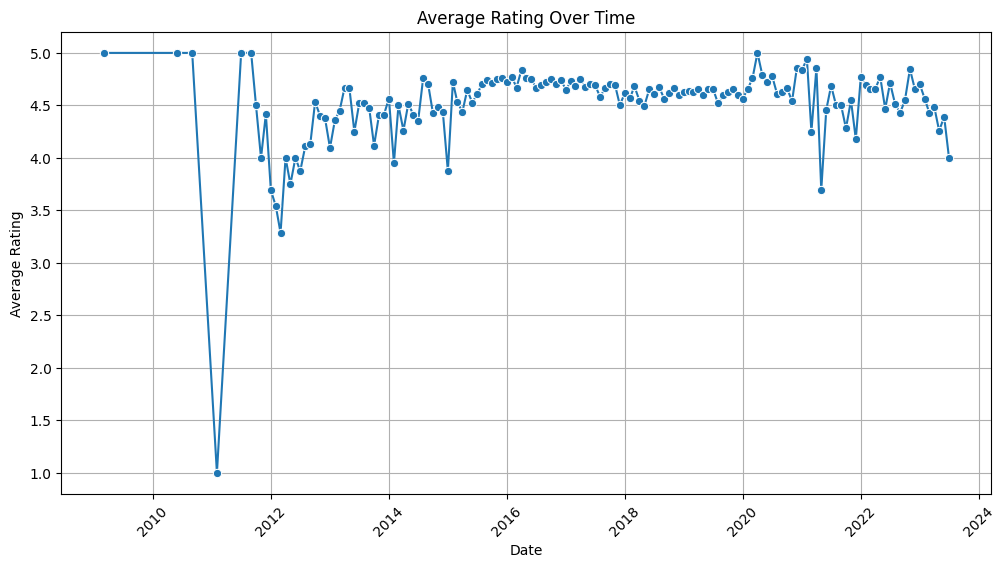

In [ ]:
# Ensure 'formatted_date' is in datetime format
data = data.reset_index()  # Reset the index to make 'formatted_date' a column again
data['formatted_date'] = pd.to_datetime(data['formatted_date'])

# Group by date and calculate average rating
trend_data = data.groupby(data['formatted_date'].dt.to_period('M')).agg({'Rating': 'mean'}).reset_index()

# Convert the period back to a string for plotting
trend_data['formatted_date'] = trend_data['formatted_date'].dt.to_timestamp()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='formatted_date', y='Rating', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Ensure 'formatted_date' is in datetime format
data = data.reset_index()  # Reset the index to make 'formatted_date' a column again
data['formatted_date'] = pd.to_datetime(data['formatted_date'])

# Group by date and calculate average rating
trend_data = data.groupby(data['formatted_date'].dt.to_period('M')).agg({'Rating': 'mean'}).reset_index()

# Convert the period back to a timestamp for plotting
trend_data['formatted_date'] = trend_data['formatted_date'].dt.to_timestamp()

# Create the interactive line plot using Plotly
fig = px.line(trend_data,
              x='formatted_date',
              y='Rating',
              title='Average Rating Over Time',
              labels={'formatted_date': 'Date', 'Rating': 'Average Rating'},
              markers=True)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Rating',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Show the interactive plot
fig.show()

Seems that in February 2011, the average rating was at its lowest equal to 1 but seems to have a few high average ratings of 5 with the dates March 2009, Jun 2010,September 2010, July 2011, September 2011, and in April 2020.

Therefore the rating is eratic with declines and improve.  

### Word Cloud

In [ ]:
!pip install wordcloud
#Import the wordcloud library
from wordcloud import WordCloud

In [ ]:
data_5=data[data["Rating"]==5]
data_5

Review  \
formatted_date                                                      
16-05-2019      Sono entrata per caso in questa chiesa. E’ mer...   
8-10-2019       Gran bel trionfo di fasti reali! Belle sale co...   
25-07-2016      Affreschi cinquecenteschi di scuola leonardesc...   
9-03-2020       Se visitate Berlino dovete sicuramente passarc...   
10-03-2019      Stupenda basilica, in stile gotico , orgoglio ...   
...                                                           ...   
25-06-2019      Veramente luogo stupendo, stupendo , stupendo,...   
7-10-2016       Una bellissima passeggiata immersa nel verde, ...   
21-05-2018      Capolavori in arte. Non puoi non entrare e non...   
11-05-2016      Sono stata ad Ottobre 2013, fantastico... Inna...   
23-01-2020      È stato una emozione che non so descrivere ave...   

                                                Hotel  Rating Sentiment  \
formatted_date                                                            
16-05-2019                                 Bellissima     5.0   Neutral   
8-10-2019                                 Bellissimo      5.0   Neutral   
25-07-2016                            Da non perdere      5.0   Neutral   
9-03-2020        Luogo raccolto nel mezzo della città     5.0  Positive   
10-03-2019                                Stupendo!!!     5.0   Neutral   
...                                               ...     ...       ...   
25-06-2019                                          😍     5.0   Neutral   
7-10-2016                                           😍     5.0   Neutral   
21-05-2018                              😍 Eccellenza      5.0   Neutral   
11-05-2016                                        😍😍😍     5.0   Neutral   
23-01-2020                              😔😔😔Bellissimo     5.0   Neutral   

                Sentiment_Numeric  Length  
formatted_date                             
16-05-2019                      0     119  
8-10-2019                       0     123  
25-07-2016                      0     202  
9-03-2020                       1     727  
10-03-2019                      0     112  
...                           ...     ...  
25-06-2019                      0      99  
7-10-2016                       0     219  
21-05-2018                      0     119  
11-05-2016                      0     148  
23-01-2020                      0     355  

[14492 rows x 6 columns]

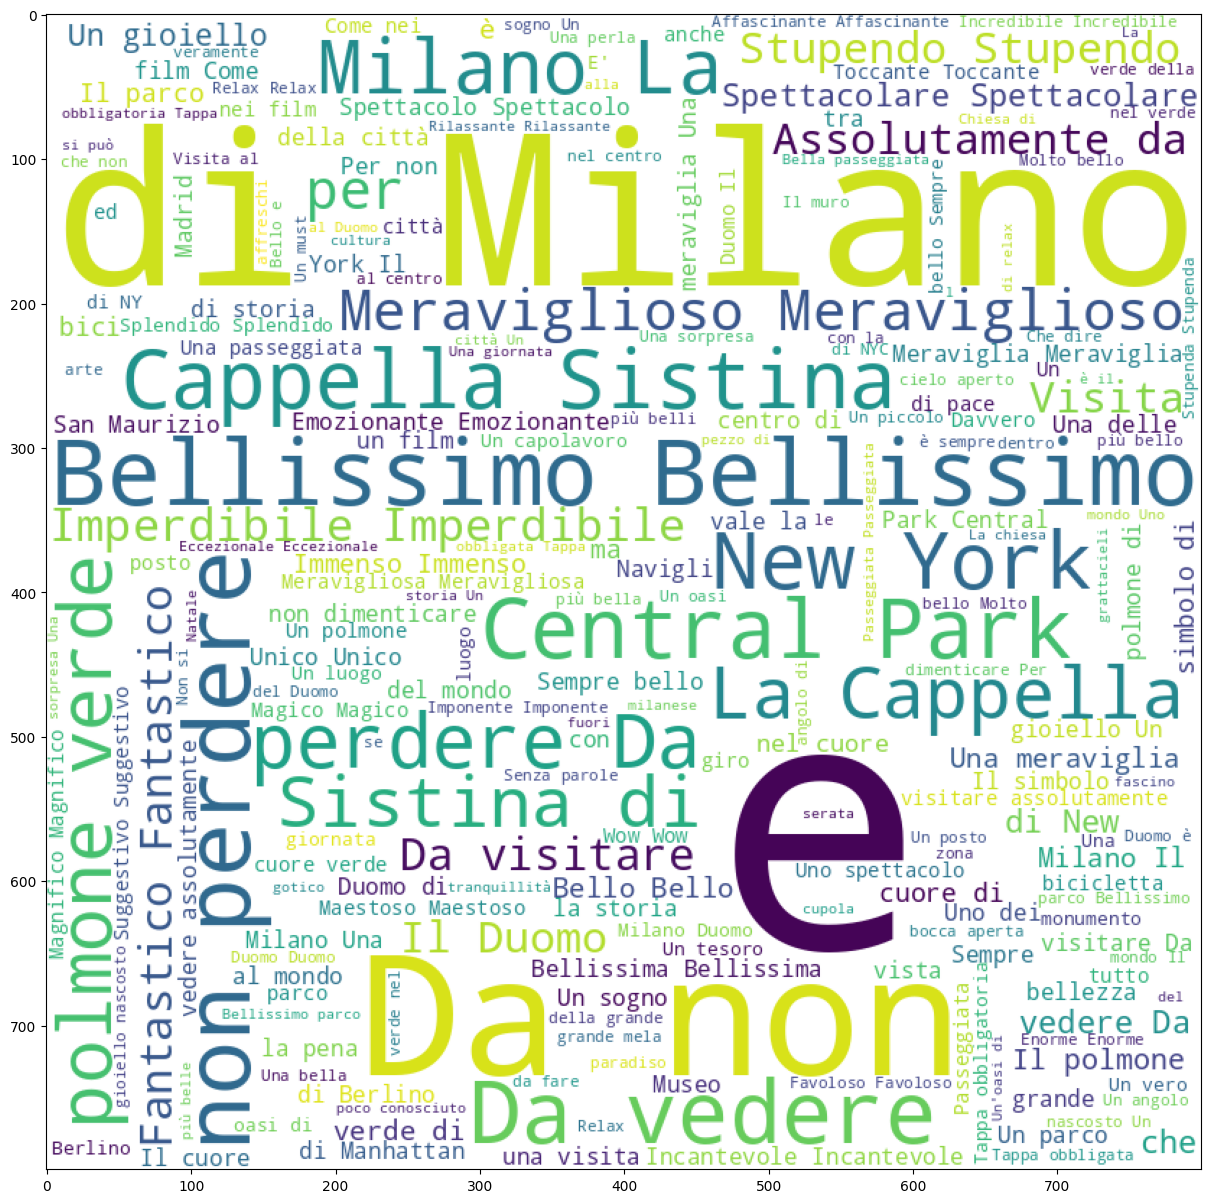

In [ ]:
# the highest work repeat in the review rating 5
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(data_5['Hotel']))

plt.imshow(wc1)

Milano -Bellisimo - Perdere - Cental Park - Vedere - Meraviglioso - Imperdibile - Cappella Sistina

In [ ]:
data_4=data[data["Rating"]==4]
data_4

Review  \
formatted_date                                                      
7-02-2021       Bellissimo fuori, un po' scuro dentro dato dal...   
22-06-2017      Bella struttura molto appariscente. Bella piaz...   
29-08-2018      Siamo stati portati da amici Berlinesi a veder...   
26-04-2017      Al memoriale si accede facilmente arrivando al...   
13-08-2019      Prenotata online da casa, bisogna scegliere da...   
...                                                           ...   
19-09-2021      bellissimo, l'interno, l'esterno e ben organiz...   
5-12-2017       Abbiamo approfittato che dalle 18 alle 19 l'en...   
27-09-2019      Abbiamo cenato qui con tutta la famiglia per l...   
7-02-2016       Passeggiando tranquillamente si apprezza la be...   
25-12-2015      Se non fai un bel giro per Central Park non pu...   

                                         Hotel  Rating Sentiment  \
formatted_date                                                     
7-02-2021                          Bellissimo      4.0   Neutral   
22-06-2017         Bello e sempre spettacolare     4.0   Neutral   
29-08-2018                Muro a cielo aperto      4.0   Neutral   
26-04-2017                   Risveglia i sensi     4.0  Negative   
13-08-2019                   Vista su Berlino      4.0   Neutral   
...                                        ...     ...       ...   
19-09-2021                    è uno spettacolo     4.0   Neutral   
5-12-2017                             é gratis     4.0   Neutral   
27-09-2019                           ‘’Santo’’     4.0   Neutral   
7-02-2016                               ������     4.0   Neutral   
25-12-2015      🇺🇸 passeggiata obbligatoria 🇺🇸     4.0  Positive   

                Sentiment_Numeric  Length  
formatted_date                             
7-02-2021                       0     146  
22-06-2017                      0     134  
29-08-2018                      0     149  
26-04-2017                     -1     873  
13-08-2019                      0     192  
...                           ...     ...  
19-09-2021                      0     163  
5-12-2017                       0     283  
27-09-2019                      0     443  
7-02-2016                       0     129  
25-12-2015                      1     288  

[4306 rows x 6 columns]

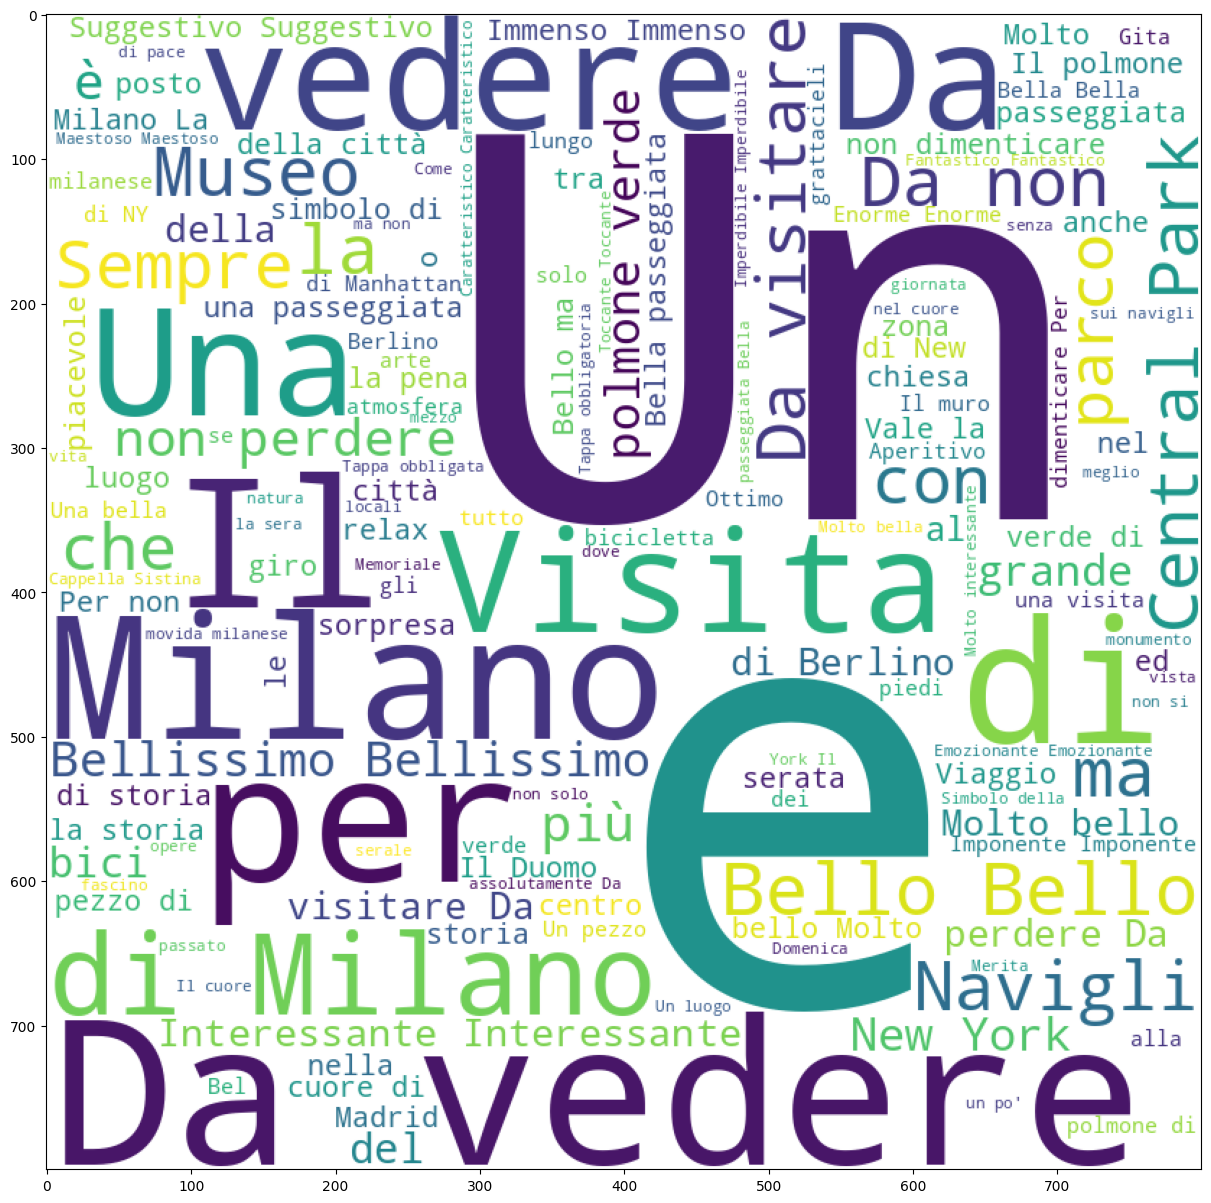

In [ ]:
# the highest work repeat in the review rating 4
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(data_4['Hotel']))

plt.imshow(wc2)

Un - Ile - Una - Da - Per - Milano - Bello - Vedere - Vista - Bellisimo

In [ ]:
data_3=data[data["Rating"]==3]
data_3

Review  \
formatted_date                                                      
14-08-2017      È indubbiamente un museo che merita di essere ...   
21-08-2019      Il muro di Berlino, sentito nominare ogni gior...   
2-10-2018       Tra il Museo del Terrore ed un pezzo di muro s...   
2-02-2018       Abbiamo girato, girato e visto e non visto que...   
23-02-2018      Non so perché credevo in qualcosa che mi lasci...   
...                                                           ...   
20-03-2014      peccato, potrebbe esr la zona più caratteristi...   
2-01-2017       zona molto divertente di milano, piena di raga...   
15-01-2017      Vicino potsdamer platz , c'e la topografia del...   
2-04-2018       fa una figura migliore dall'alto dei grattacie...   
20-02-2012      vale la pena di vederlo , passando da milano.....   

                                                            Hotel  Rating  \
formatted_date                                                              
14-08-2017                                 Bene ma non benissimo      3.0   
21-08-2019                                      Non entusiasmante     3.0   
2-10-2018       "E' un percorso tra la triste realtà della sto...     3.0   
2-02-2018                     "SOLO PER VERI INTENDITORI DI ARTE"     3.0   
23-02-2018                                 'Pensavo molto di più'     3.0   
...                                                           ...     ...   
20-03-2014                                     vorrei ma nn posso     3.0   
2-01-2017                                          zona giovanile     3.0   
15-01-2017                                        È un Riassunto      3.0   
2-04-2018                                           è un parco...     3.0   
20-02-2012        è uno degli angoli più caratteristici di milano     3.0   

               Sentiment  Sentiment_Numeric  Length  
formatted_date                                       
14-08-2017       Neutral                  0     426  
21-08-2019       Neutral                  0     364  
2-10-2018        Neutral                  0     413  
2-02-2018       Negative                 -1     422  
23-02-2018       Neutral                  0     215  
...                  ...                ...     ...  
20-03-2014       Neutral                  0     454  
2-01-2017        Neutral                  0     116  
15-01-2017       Neutral                  0     299  
2-04-2018       Positive                  1     202  
20-02-2012       Neutral                  0     346  

[911 rows x 6 columns]

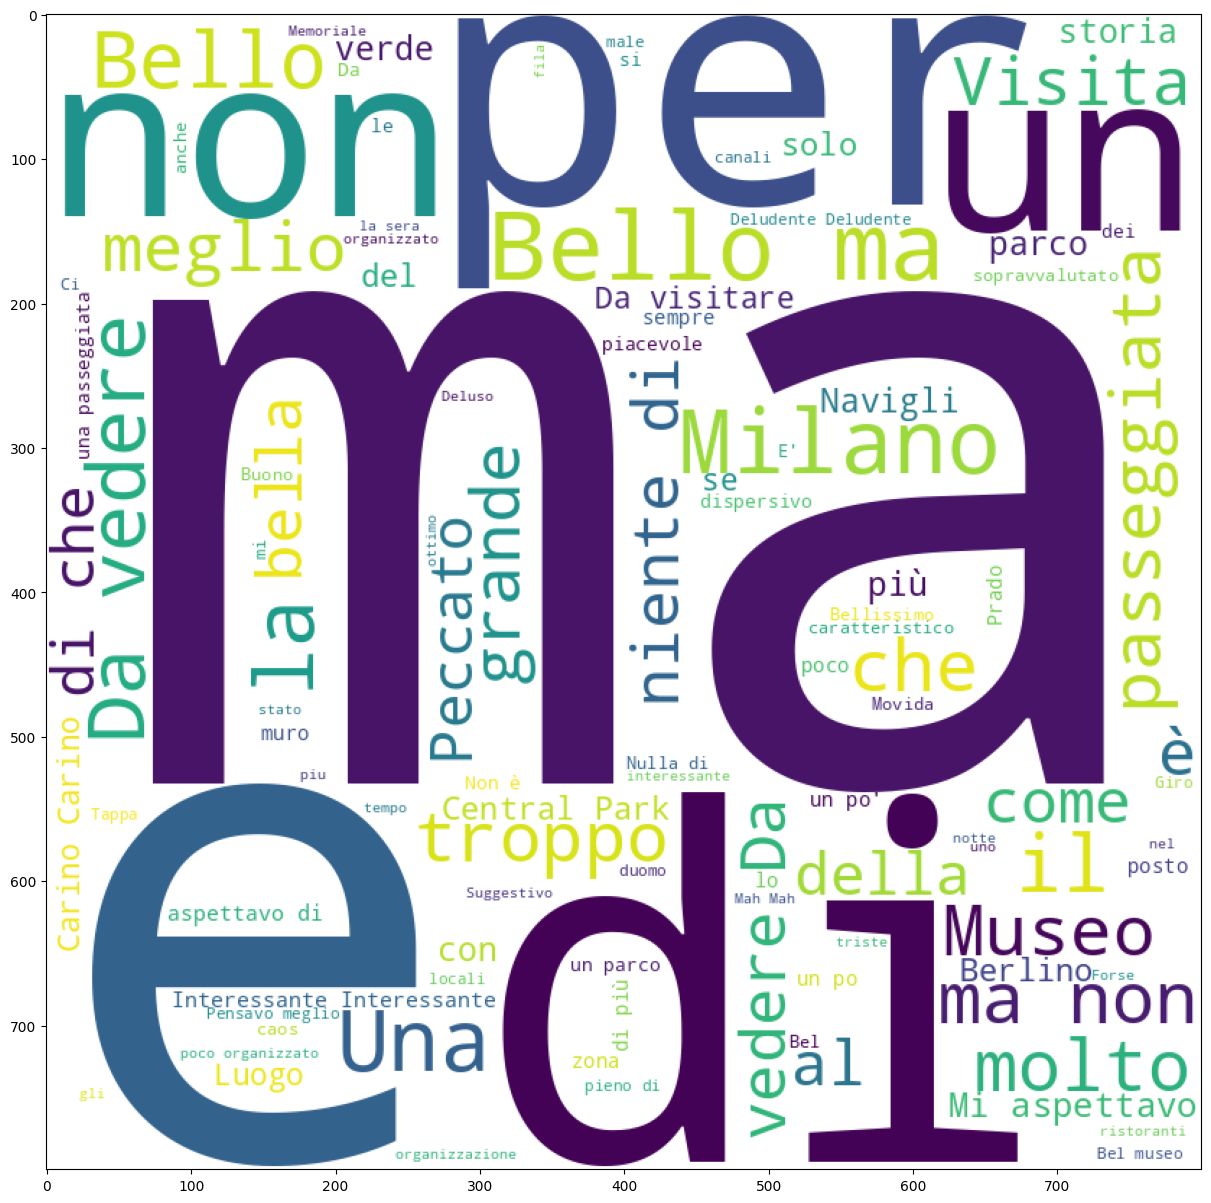

In [ ]:
# the highest work repeat in the review rating 3
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(data_3['Hotel']))

plt.imshow(wc3)

Ma - Di - e - Non - Un - Milano - Bello - Vedere - interessante - delusione - Carino

In [ ]:
data_2=data[data["Rating"]==2]
data_2

Review  \
formatted_date                                                      
13-09-2019      Metri e metri di   murales banali,  pacchiani ...   
13-12-2019      E' sul ciglio della strada , già l'argomento d...   
22-08-2017      La topografia del terrore è uno tra i tanti si...   
16-02-2019      Luogo simbolo della movida milanese in tutte l...   
12-03-2012      Abbandono è dire poco. Non esprime tutta la de...   
...                                                           ...   
6-11-2012       si salva solo il naviglio grande (la parte di ...   
29-09-2019      avendo avuto l' occasione di visitarlo 15 anni...   
1-05-2017       gente, gente, gente dappertutto.locali inutilm...   
9-02-2016       Mi ha un po' deluso, forse perchè non c'era ac...   
12-10-2019      Ehh quando ero giovane io era cosi bello andar...   

                                    Hotel  Rating Sentiment  \
formatted_date                                                
13-09-2019            1,3 km. di sbadigli     2.0   Neutral   
13-12-2019                            ;-(     2.0   Neutral   
22-08-2017           A Berlino c'è di più     2.0   Neutral   
16-02-2019             A me non piacciono     2.0   Neutral   
12-03-2012                      Abbandono     2.0   Neutral   
...                                   ...     ...       ...   
6-11-2012              stato di abbandono     2.0   Neutral   
29-09-2019              troppo rivisitato     2.0   Neutral   
1-05-2017       un carnaio sopravvalutato     2.0   Neutral   
9-02-2016                   un po' deluso     2.0   Neutral   
12-10-2019                              😔     2.0   Neutral   

                Sentiment_Numeric  Length  
formatted_date                             
13-09-2019                      0     139  
13-12-2019                      0     156  
22-08-2017                      0     426  
16-02-2019                      0     596  
12-03-2012                      0     380  
...                           ...     ...  
6-11-2012                       0     144  
29-09-2019                      0     123  
1-05-2017                       0     188  
9-02-2016                       0     152  
12-10-2019                      0     116  

[222 rows x 6 columns]

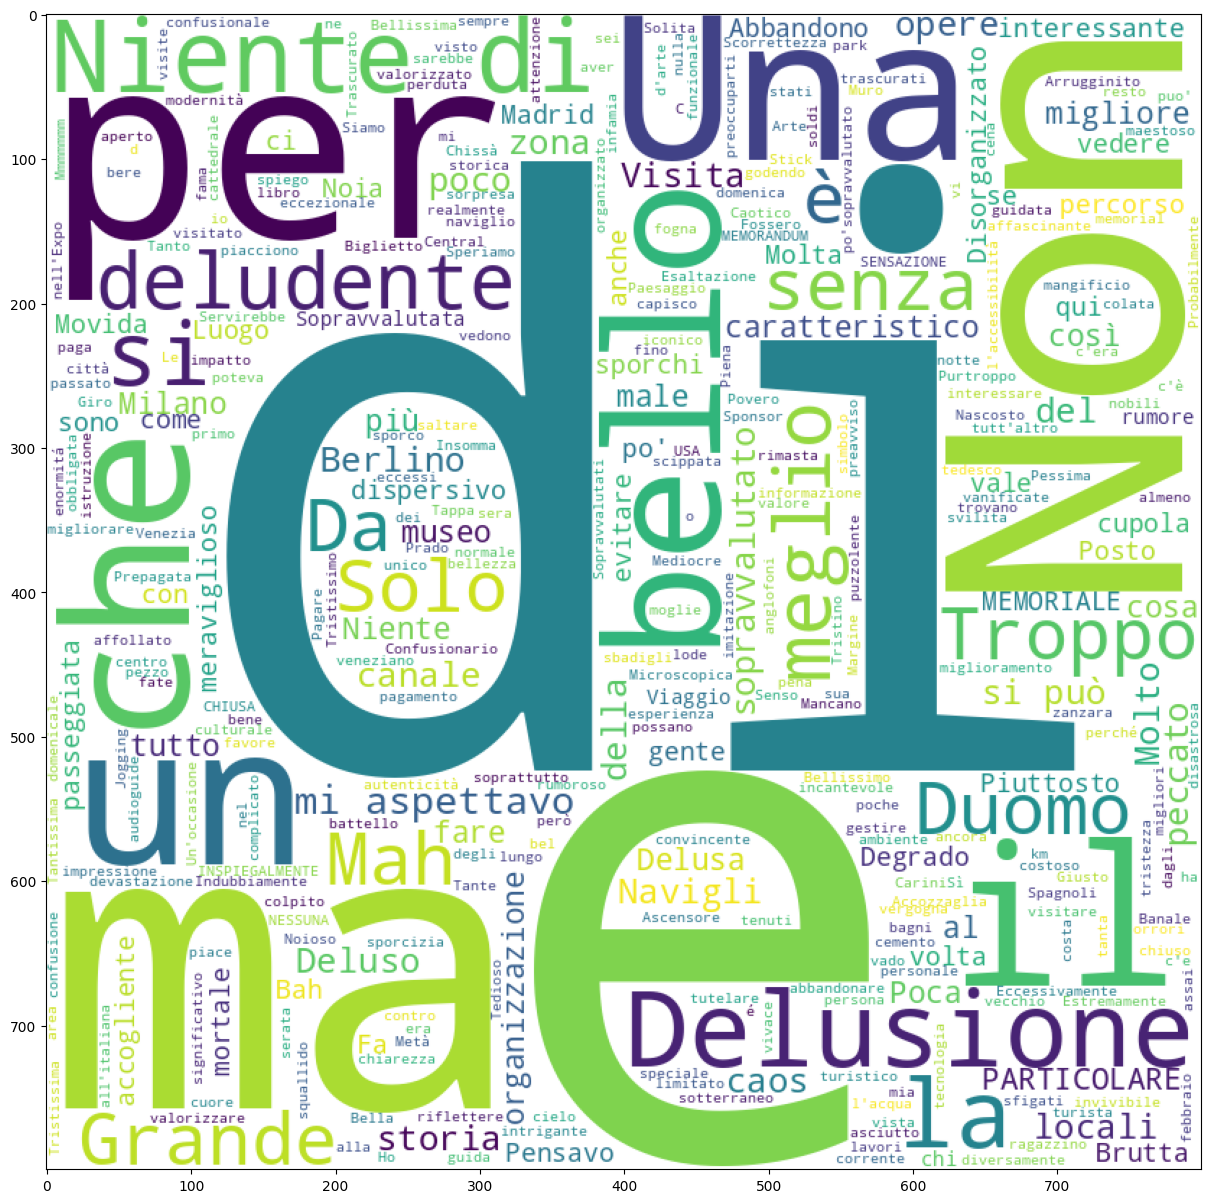

In [ ]:
# the highest work repeat in the review rating 2
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(data_2['Hotel']))

plt.imshow(wc4)

Ma - Di - Una - Il - Per - Non - Bello - Meglio - delusione - deludente - Troppo

In [ ]:
data_1=data[data["Rating"]==1]
data_1

Review  \
formatted_date                                                      
19-04-2022      Si prenota con giorni di anticipo, si paga non...   
28-12-2017      Nulla che non si sia già visto e la fastidiosa...   
20-01-2015      Sono stata a Milano per una settimana di vacan...   
4-05-2019       Siamo andati lungo i navigli e alla Darsena a ...   
22-06-2018      Non amo particolarmente i parchi,ma questo è s...   
...                                                           ...   
10-12-2019      Il posto è accettabile oltre al fatto che ogni...   
28-10-2018      non lo so, forse troppo alte le aspettative, m...   
6-05-2017       Il muro, o meglio i muri sono due, molti non l...   
6-01-2019       volevo fare una visita al duomo.. ma controlli...   
19-12-2014      non ho mai capito i fans dei navigli... sarà x...   

                                                   Hotel  Rating Sentiment  \
formatted_date                                                               
19-04-2022      A che serve l'orario della prenotazione?     1.0   Neutral   
28-12-2017                            Accalappia turisti     1.0   Neutral   
20-01-2015                              Assolutamente no     1.0   Neutral   
4-05-2019                            Atmosfera natalizia     1.0  Negative   
22-06-2018                                        Bello.     1.0   Neutral   
...                                                  ...     ...       ...   
10-12-2019                     n.c.s.p. Troppo inquinato     1.0  Positive   
28-10-2018                             niente di che....     1.0   Neutral   
6-05-2017                            per non dimenticare     1.0  Negative   
6-01-2019                                         perchè     1.0   Neutral   
19-12-2014                           squallida decadenza     1.0   Neutral   

                Sentiment_Numeric  Length  
formatted_date                             
19-04-2022                      0     313  
28-12-2017                      0     105  
20-01-2015                      0     424  
4-05-2019                      -1     288  
22-06-2018                      0     187  
...                           ...     ...  
10-12-2019                      1     412  
28-10-2018                      0     112  
6-05-2017                      -1     345  
6-01-2019                       0     274  
19-12-2014                      0     388  

[126 rows x 6 columns]

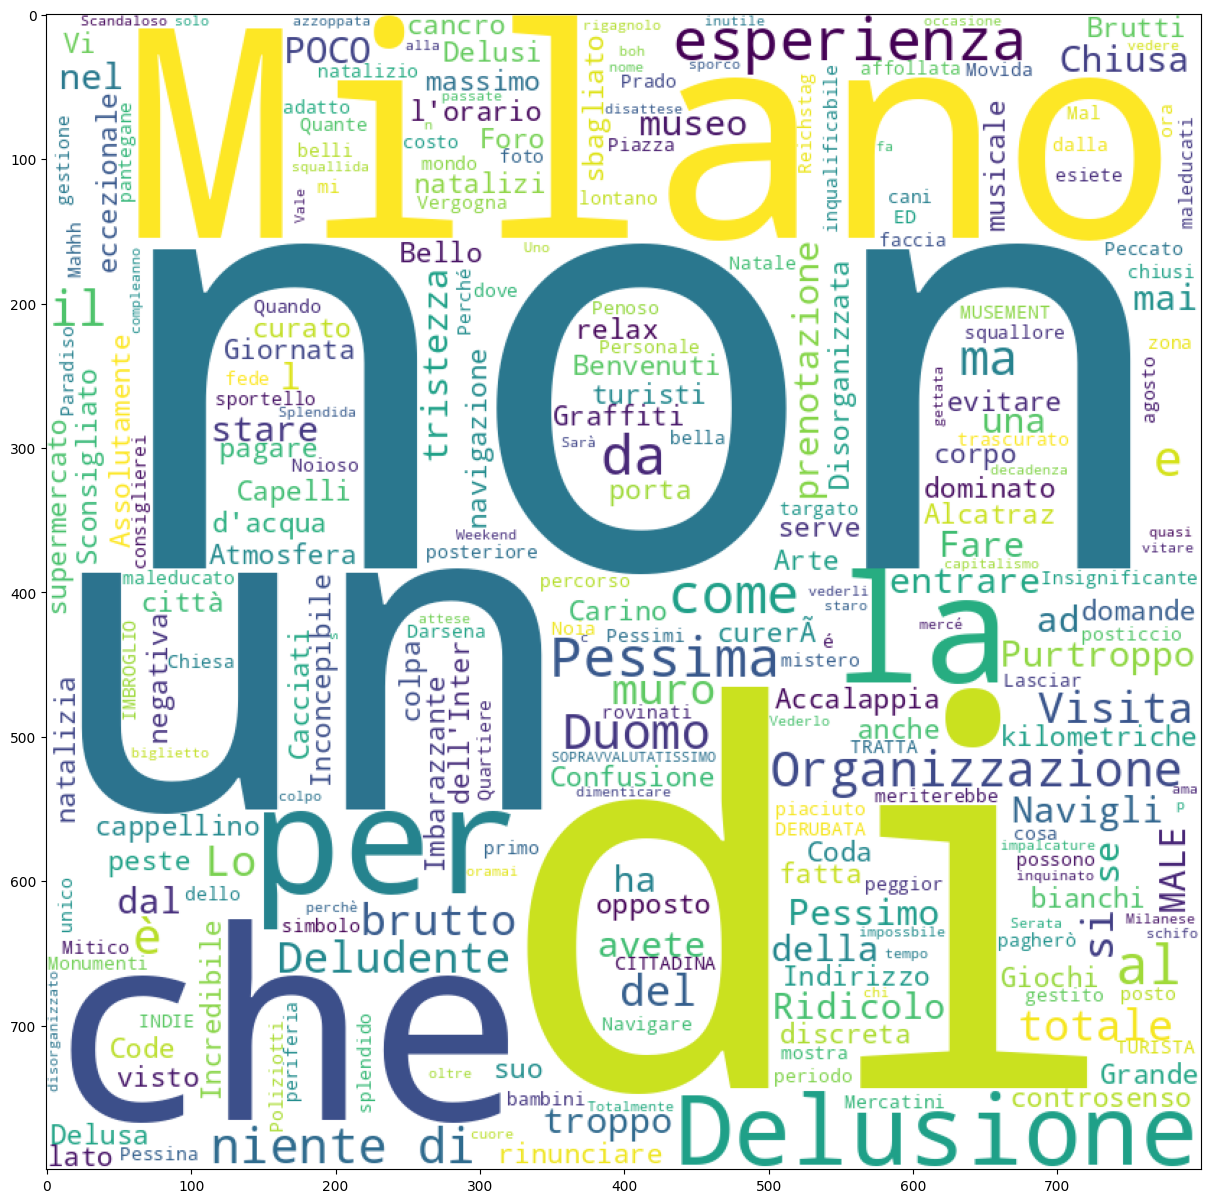

In [ ]:
# the highest work repeat in the review rating 1
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(data_1['Hotel']))

plt.imshow(wc5)

Milano - Delusione - Esperienza - Duomo - Organizzazione - Niente - Poco - Pessima

In [ ]:
# Create a DataFrame
copied_df = pd.DataFrame(data)
copied_df.head()

index formatted_date                                             Review  \
0      0     2019-05-16  Sono entrata per caso in questa chiesa. E’ mer...   
1      1     2021-02-07  Bellissimo fuori, un po' scuro dentro dato dal...   
2      2     2019-10-08  Gran bel trionfo di fasti reali! Belle sale co...   
3      3     2017-06-22  Bella struttura molto appariscente. Bella piaz...   
4      4     2017-08-14  È indubbiamente un museo che merita di essere ...   

   Hotel  Rating  Sentiment  Sentiment_Numeric  Length  
0      0     5.0          1                  0     119  
1      1     4.0          1                  0     146  
2      1     5.0          1                  0     123  
3      2     4.0          1                  0     134  
4      3     3.0          1                  0     426

In [ ]:
copied_df.columns

Index(['index', 'formatted_date', 'Review', 'Hotel', 'Rating', 'Sentiment',
       'Sentiment_Numeric', 'Length'],
      dtype='object')

In [ ]:
# drop the index
copied_df.drop(['index'], axis=1, inplace=True)
copied_df.head()


formatted_date                                             Review  Hotel  \
0     2019-05-16  Sono entrata per caso in questa chiesa. E’ mer...      0   
1     2021-02-07  Bellissimo fuori, un po' scuro dentro dato dal...      1   
2     2019-10-08  Gran bel trionfo di fasti reali! Belle sale co...      1   
3     2017-06-22  Bella struttura molto appariscente. Bella piaz...      2   
4     2017-08-14  È indubbiamente un museo che merita di essere ...      3   

   Rating  Sentiment  Sentiment_Numeric  Length  
0     5.0          1                  0     119  
1     4.0          1                  0     146  
2     5.0          1                  0     123  
3     4.0          1                  0     134  
4     3.0          1                  0     426

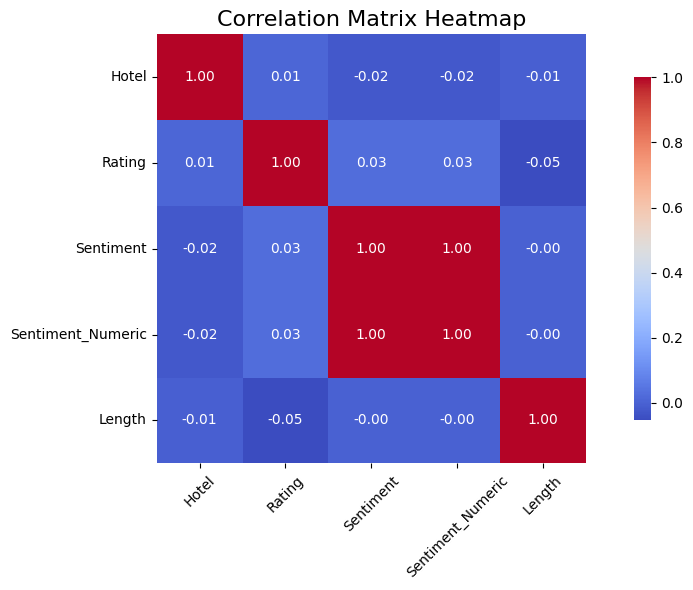

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical variables
le = LabelEncoder()
copied_df['Hotel'] = le.fit_transform(data['Hotel'])
copied_df['Sentiment'] = le.fit_transform(data['Sentiment'])

# Correlate the variables, excluding the 'Review' column
correlation_matrix = copied_df[['Hotel', 'Rating', 'Sentiment',
       'Sentiment_Numeric', 'Length']].corr()  # Exclude 'Review'

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

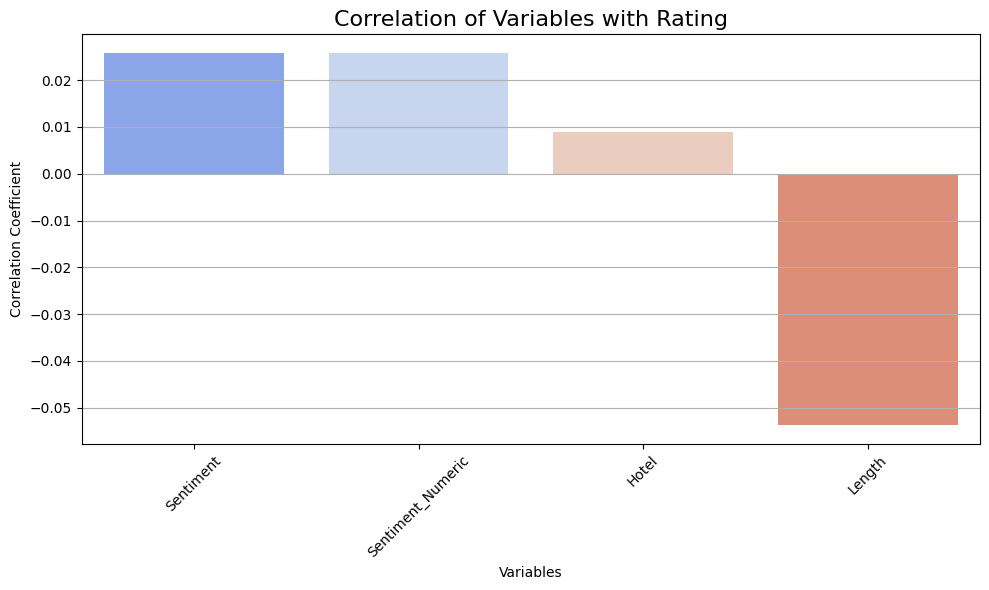

In [ ]:
# Extract the correlation values for 'Rating' and sort them
rating_correlation = correlation_matrix['Rating'].drop('Rating').sort_values(ascending=False)

# Create a bar plot for the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_correlation.index, y=rating_correlation.values, palette='coolwarm')
plt.title('Correlation of Variables with Rating', fontsize=16)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

Sentiment Counts: Sentiment
1    11430
2     1881
0      728
Name: count, dtype: int64
Total reviews: 14039
Positive reviews: 11430
Negative reviews: 1881
Neutral reviews: 728
Positive Percentage: 81.42%
Negative Percentage: 13.40%
Neutral Percentage: 5.19%


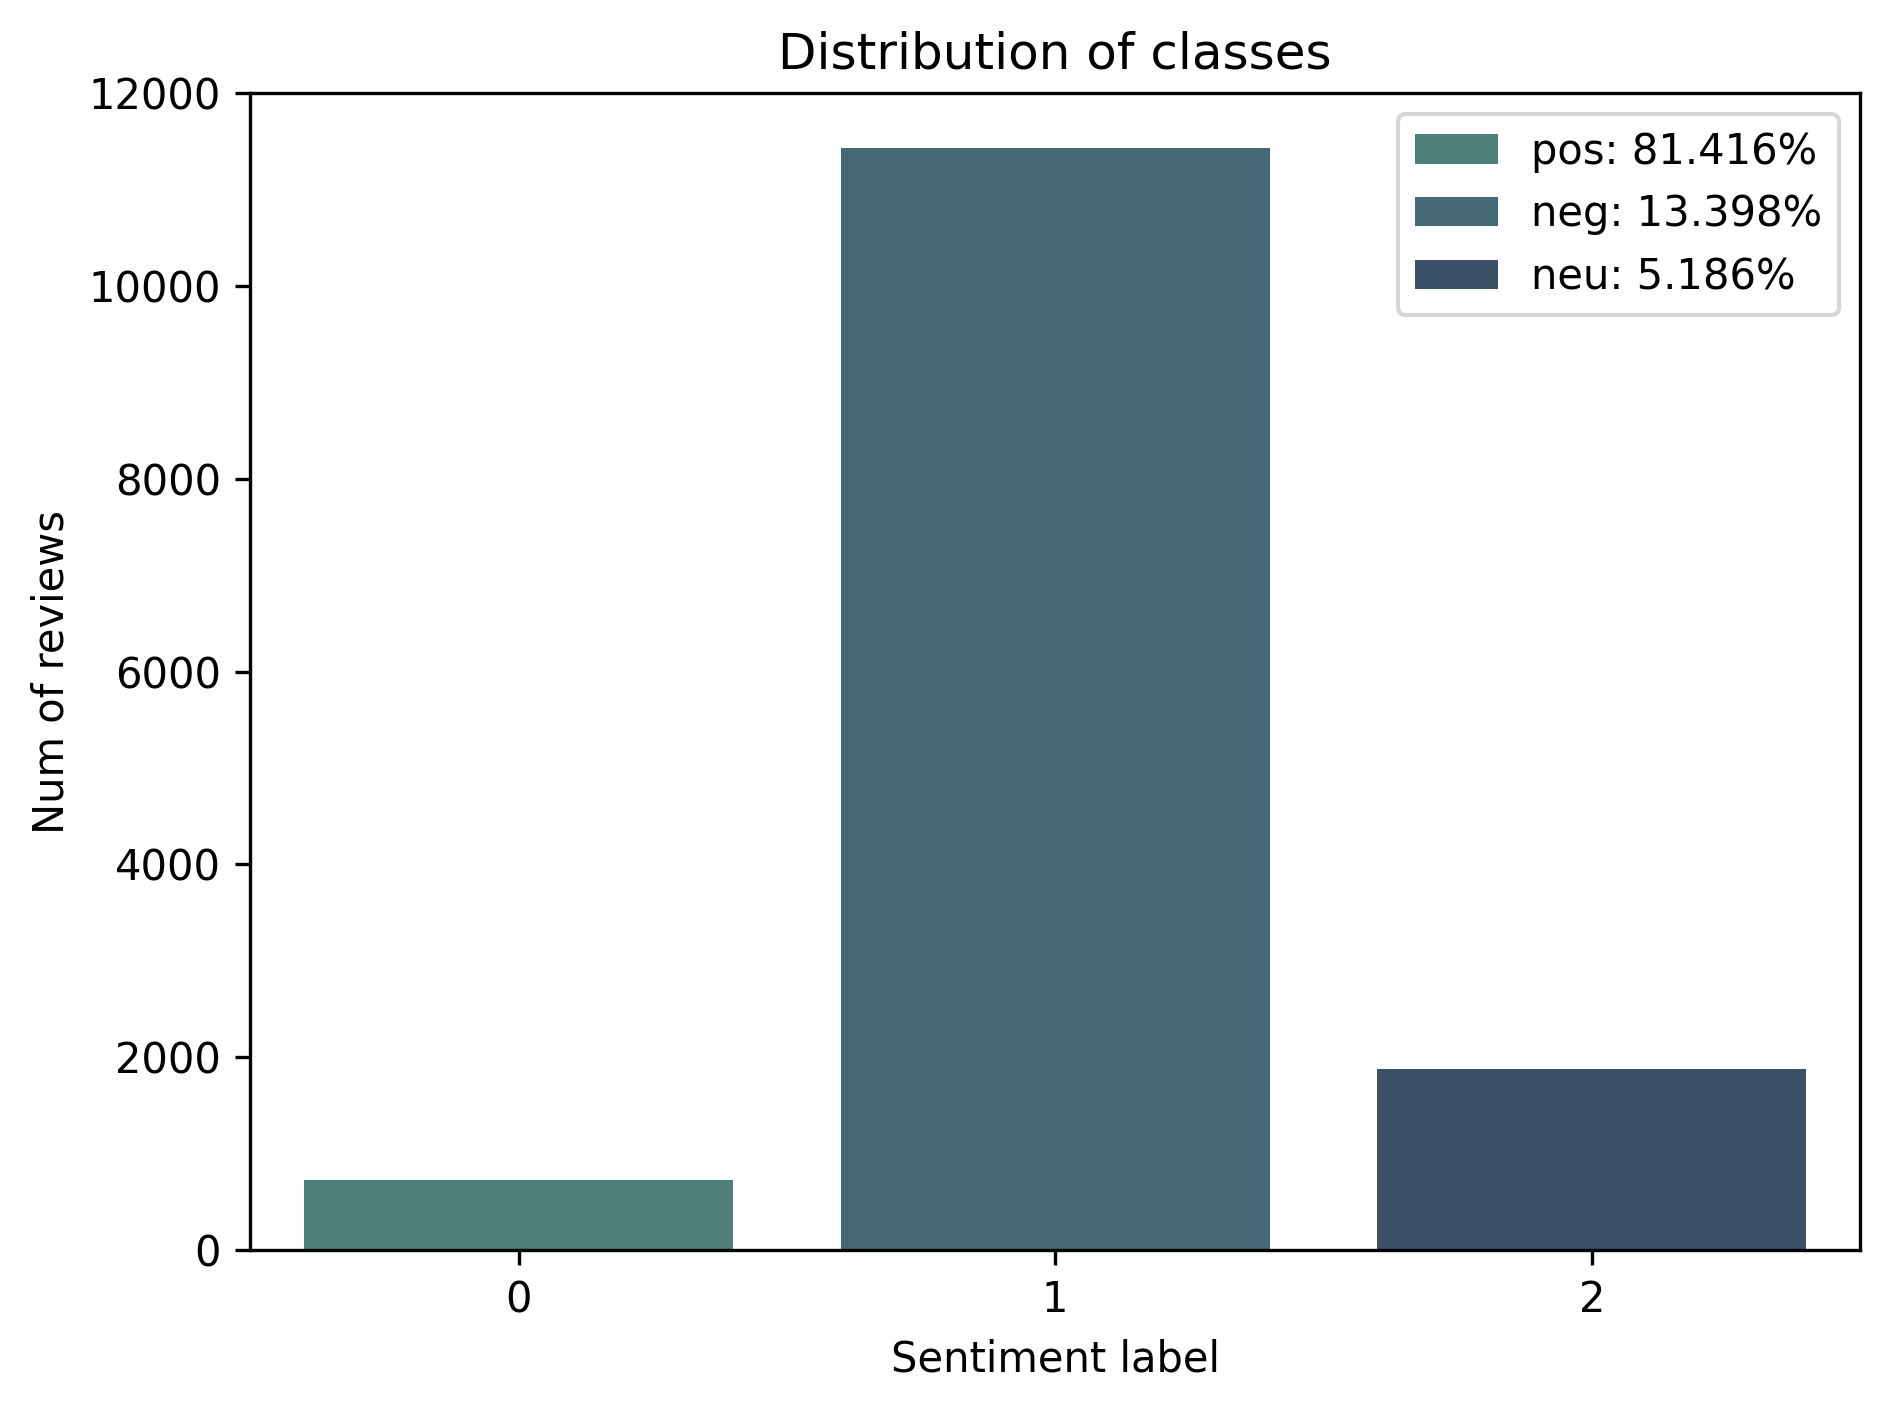

In [ ]:
# Compute the counts of each sentiment
sentiment_counts = dev_df['Sentiment'].value_counts()
print(f"Sentiment Counts: {sentiment_counts}")

# Get the total number of reviews
total_reviews = dev_df.shape[0]
[pos_count, neg_count, neu_count] = sentiment_counts.values

print(f"Total reviews: {total_reviews}")
print(f"Positive reviews: {pos_count}")
print(f"Negative reviews: {neg_count}")
print(f"Neutral reviews: {neu_count}")

# Initialize percentages
pos_perc = 0
neg_perc = 0
neu_perc = 0

# Compute percentages only if total_count is greater than 0
if total_reviews > 0:
    pos_perc = (pos_count / total_reviews) * 100
    neg_perc = (neg_count / total_reviews) * 100
    neu_perc = (neu_count / total_reviews) * 100

# Print the results
print(f"Positive Percentage: {pos_perc:.2f}%")
print(f"Negative Percentage: {neg_perc:.2f}%")
print(f"Neutral Percentage: {neu_perc:.2f}%")

fig, ax = plt.subplots(dpi=300)
ax = sns.countplot(x='Sentiment', data=dev_df,
              palette=sns.cubehelix_palette(3, start=.4, rot=-.75, light=.45, dark=.3))
ax.set_ylabel('Num of reviews')
ax.set_xlabel('Sentiment label')
ax.set_title('Distribution of classes')
ax.legend(handles=ax.patches, labels=(f'pos: {pos_perc:.3f}%', f'neg: {neg_perc:.3f}%', f'neu: {neu_perc:.3f}%'))
fig.tight_layout()
fig.show()

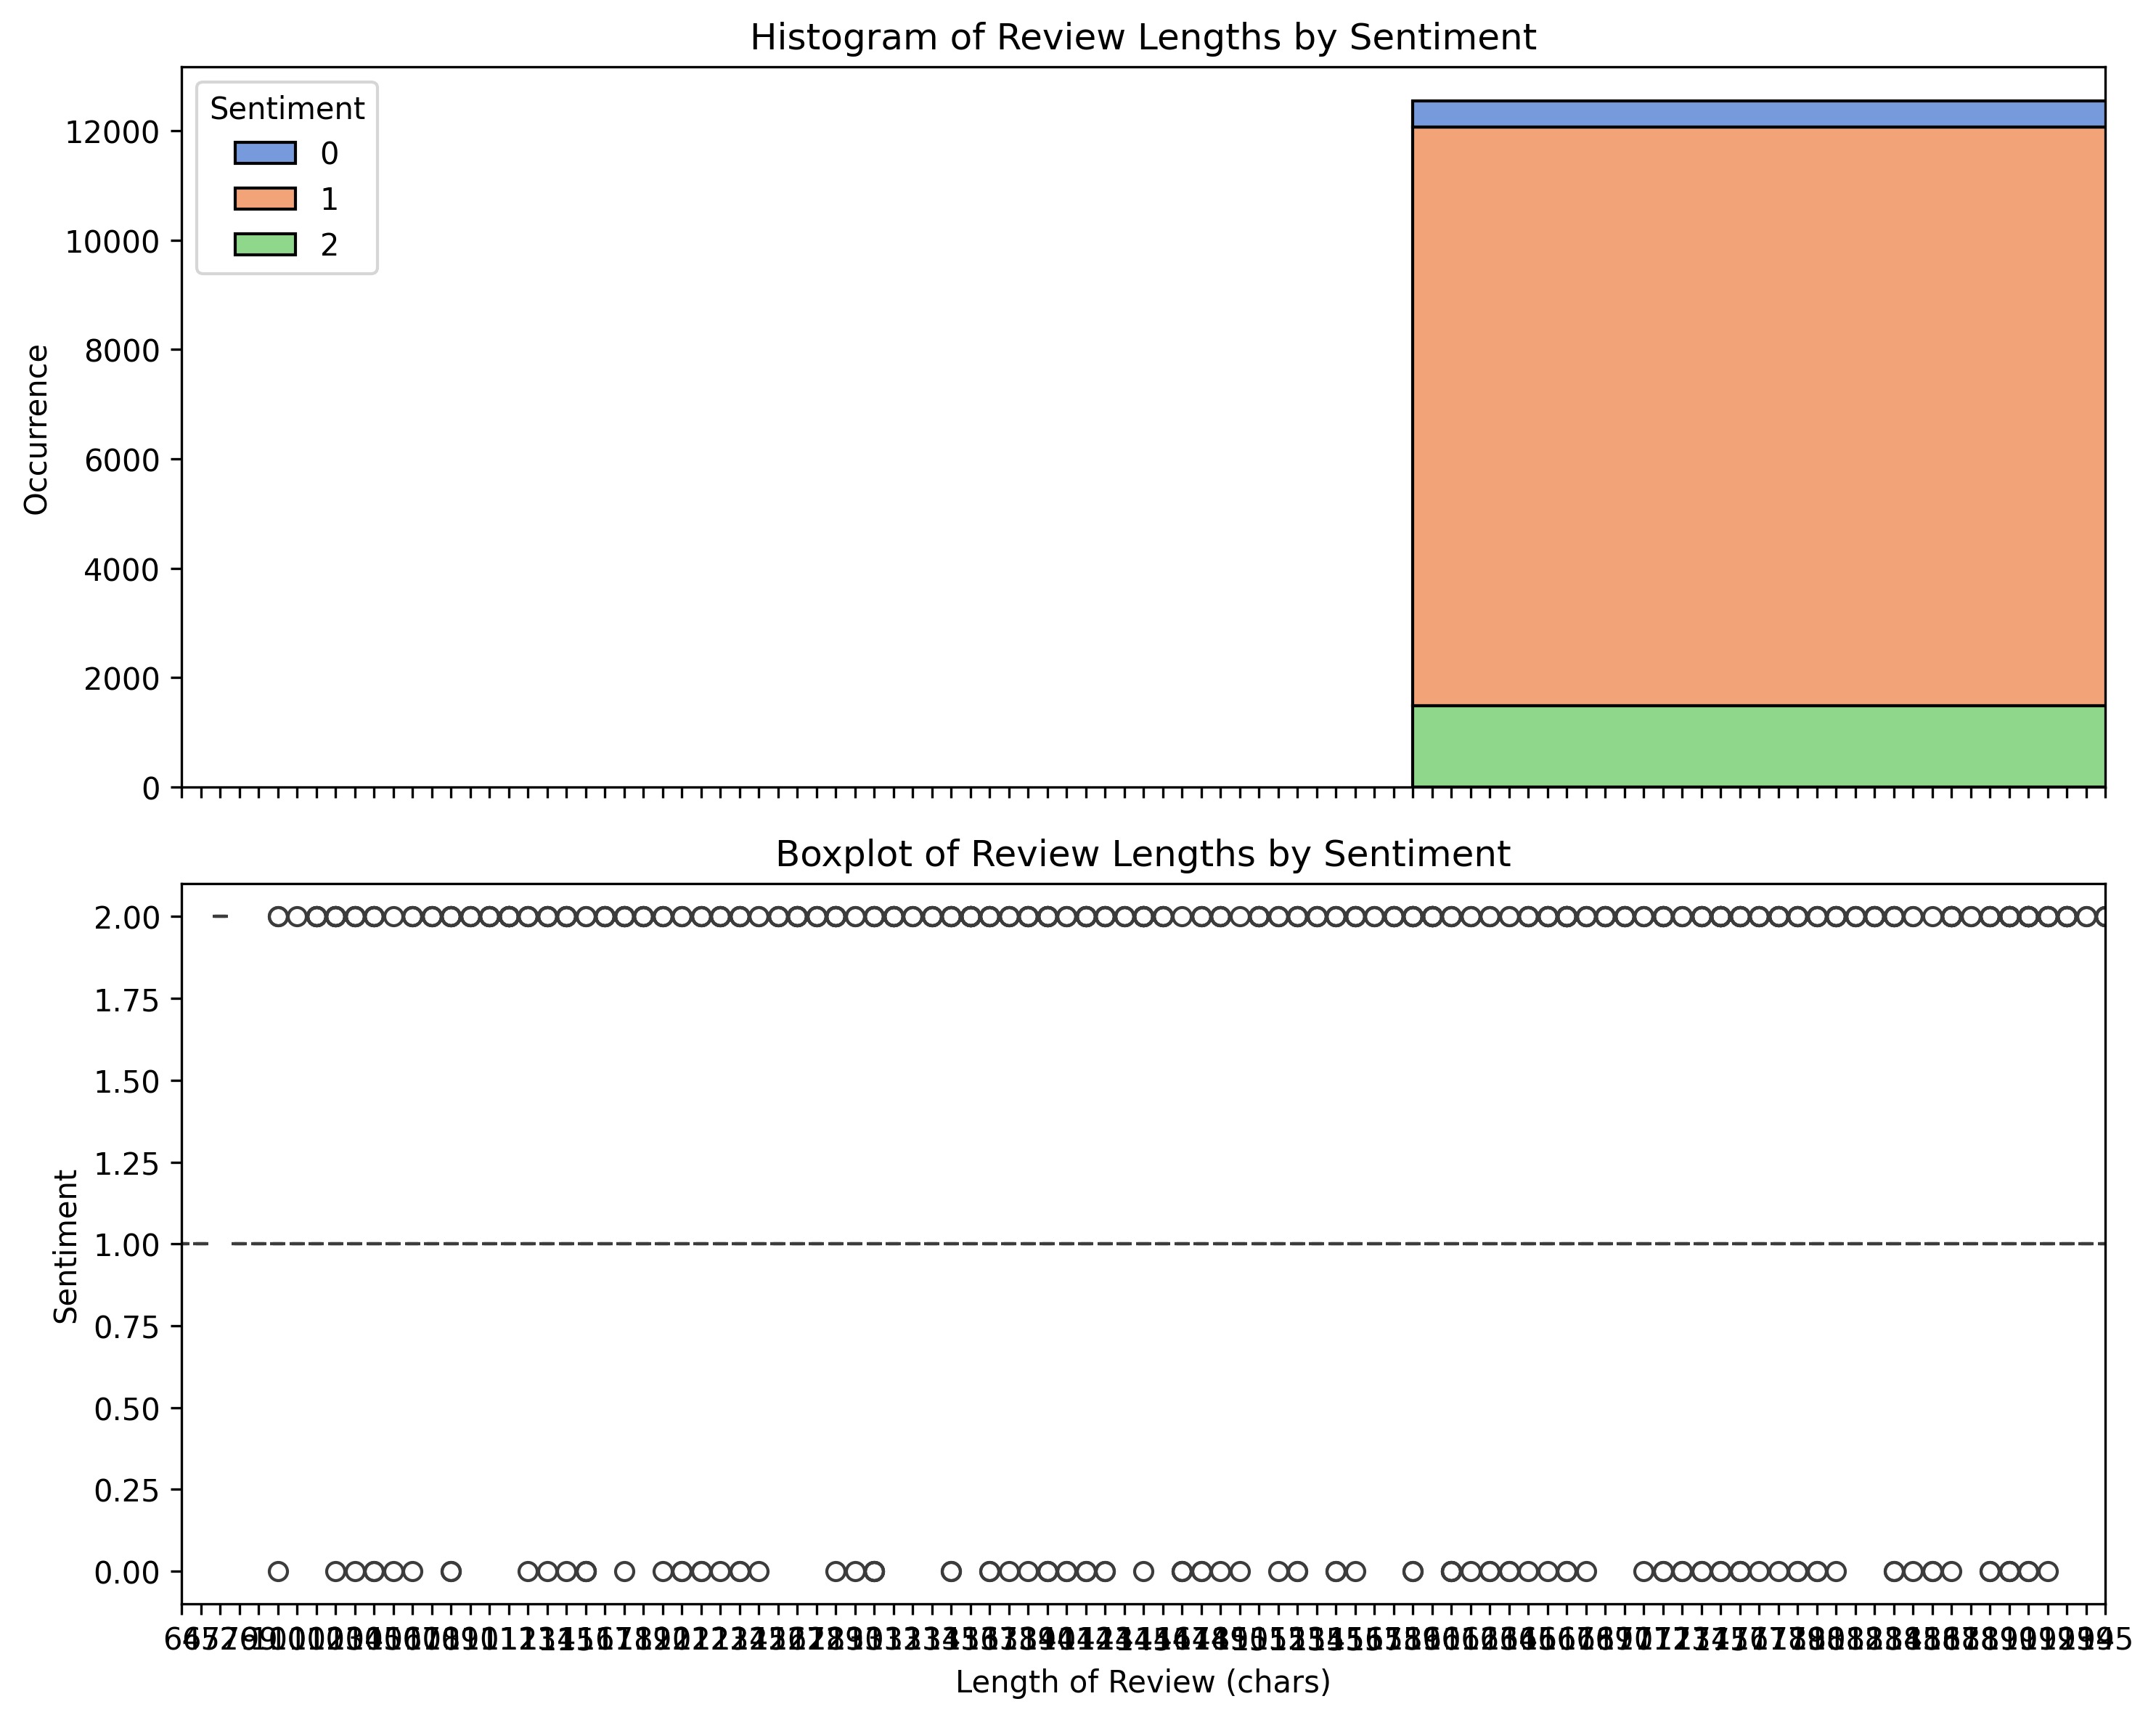

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 8), dpi=300)

# Plot histogram for review lengths by sentiment
sns.histplot(data=dev_df, x='Length', hue='Sentiment', bins=10, ax=axs[0], kde=False, multiple='stack', palette='muted')
axs[0].set_title('Histogram of Review Lengths by Sentiment')
axs[0].set_ylabel('Occurrence')

# Boxplot for review lengths by sentiment
sns.boxplot(x='Length', y='Sentiment', data=dev_df, ax=axs[1], palette='muted')
axs[1].set_title('Boxplot of Review Lengths by Sentiment')
axs[1].set_xlabel('Length of Review (chars)')

# Set common labels and limits
axs[0].set_xlabel('Length of Review (chars)')
axs[0].set_xlim(0, 100)  # Adjust based on your data
axs[1].set_xlim(0, 100)  # Adjust based on your data

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

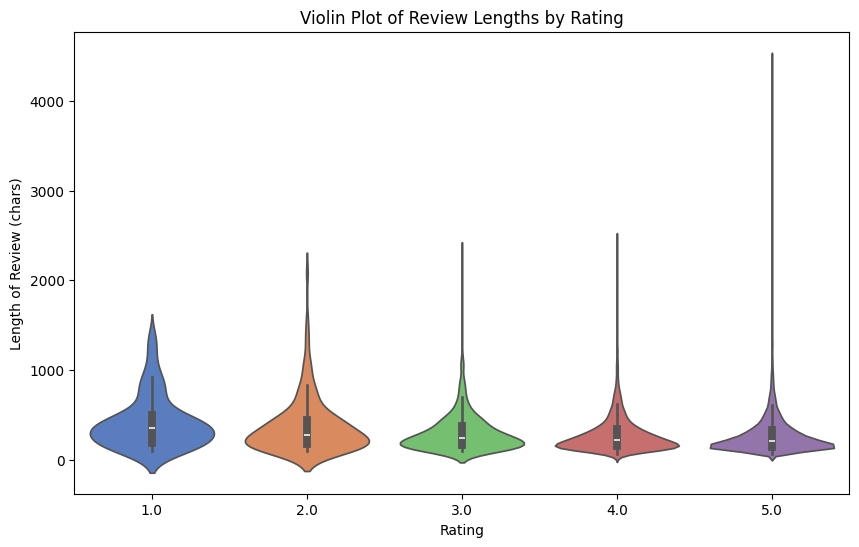

In [ ]:
# Create a violin plot for review lengths by rating
plt.figure(figsize=(10, 6))
sns.violinplot(x='Rating', y='Length', data=dev_df, palette='muted')

# Set titles and labels
plt.title('Violin Plot of Review Lengths by Rating')
plt.xlabel('Rating')
plt.ylabel('Length of Review (chars)')

# Show the plot
plt.show()

### Check Emojis

In [ ]:
# Import the 're' module for regular expressions
import re

# Function to check for emojis
def contains_emoji(text):
    # Regex pattern to match emojis
    emoji_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FAFF\U00002700-\U000027BF]'
    return bool(re.search(emoji_pattern, text))

# Apply the function to the review column
data['contains_emoji'] = data['Review'].apply(contains_emoji)

# Display the DataFrame with the new column
print(data)

       index formatted_date  \
0          0     2019-05-16   
1          1     2021-02-07   
2          2     2019-10-08   
3          3     2017-06-22   
4          4     2017-08-14   
...      ...            ...   
20052  20052     2016-10-07   
20053  20053     2018-05-21   
20054  20054     2016-05-11   
20055  20055     2019-10-12   
20056  20056     2020-01-23   

                                                  Review  Hotel  Rating  \
0      Sono entrata per caso in questa chiesa. E’ mer...      0     5.0   
1      Bellissimo fuori, un po' scuro dentro dato dal...      1     4.0   
2      Gran bel trionfo di fasti reali! Belle sale co...      1     5.0   
3      Bella struttura molto appariscente. Bella piaz...      2     4.0   
4      È indubbiamente un museo che merita di essere ...      3     3.0   
...                                                  ...    ...     ...   
20052  Una bellissima passeggiata immersa nel verde, ...  13600     5.0   
20053  Capolavori in arte. 

In [ ]:
#Remove emojies
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

### Data Preprocessing for Model Training
Text Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# 80% training, 20% testing
dev_df, eval_df = train_test_split(copied_df, test_size=0.3, random_state=42, stratify=data['Sentiment'])

# Display the results
print("Training Set:")
print(dev_df)
print("\nTesting Set:")
print(eval_df)

Training Set:
      formatted_date                                             Review  \
4054      2017-09-03  Museo molto grande e bello.Abbiamo visitato il...   
11424     2021-09-20  La visita di questa meravigliosa cattedrale è ...   
12588     2016-06-29  Nella città di new york ci voleva questa belli...   
5233      2017-08-16  Se si soggiorna a Madrid non si può non visita...   
5725      2013-03-18  Questo gioiello rinascimentale è visitabile gr...   
...              ...                                                ...   
10547     2022-09-26  Vera icona di Milano, il Duomo non mi ha mai c...   
11341     2018-01-30  Abbiamo trascorso un paio di ore piacevolissim...   
4103      2015-11-22  Bellissima Chiesa in corso Magenta, adiacente ...   
18881     2019-09-06  uno dei pochi luoghi di berlino per vedere qua...   
7927      2018-09-25  Salendo dalla metro, scale centrali, consiglio...   

       Hotel  Rating  Sentiment  Sentiment_Numeric  Length  
4054    2365     3.0    

In [ ]:
print(f"Development dataset size: {dev_df['Sentiment'].size}")
print(f"Development dataset size: {eval_df['Sentiment'].size}")

Development dataset size: 14039
Development dataset size: 6018


In [ ]:
dev_df.head()

formatted_date                                             Review  \
4054      2017-09-03  Museo molto grande e bello.Abbiamo visitato il...   
11424     2021-09-20  La visita di questa meravigliosa cattedrale è ...   
12588     2016-06-29  Nella città di new york ci voleva questa belli...   
5233      2017-08-16  Se si soggiorna a Madrid non si può non visita...   
5725      2013-03-18  Questo gioiello rinascimentale è visitabile gr...   

       Hotel  Rating  Sentiment  Sentiment_Numeric  Length  
4054    2365     3.0          1                  0     291  
11424   7346     2.0          1                  0     359  
12588   8236     5.0          2                  1     361  
5233    3059     5.0          1                  0     137  
5725    3480     5.0          0                 -1     443

In [ ]:
# import library
!pip install transformers torch

In [ ]:
import torch
from transformers import BertForSequenceClassification, AdamW

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('dbmdz/bert-base-italian-uncased', num_labels=2)  # Adjust num_labels as needed

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-italian-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31102, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Replace these with your actual data
input_ids = torch.randint(0, 30522, (64, 128))
attention_mask = torch.randint(0, 2, (64, 128))
labels = torch.randint(0, 2, (64,))

# Create a TensorDataset
train_dataset = TensorDataset(input_ids, attention_mask, labels)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 3  # Set the number of epochs
loss_values = []  # List to store loss values for visualization
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for batch in train_loader:
        input_ids_batch, attention_mask_batch, labels_batch = [b.to(device) for b in batch]

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch, labels=labels_batch)
        loss = outputs.loss
        total_loss += loss.item()  # Accumulate loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)  # Store average loss for this epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/3, Loss: 0.7047
Epoch 2/3, Loss: 0.6938
Epoch 3/3, Loss: 0.6998


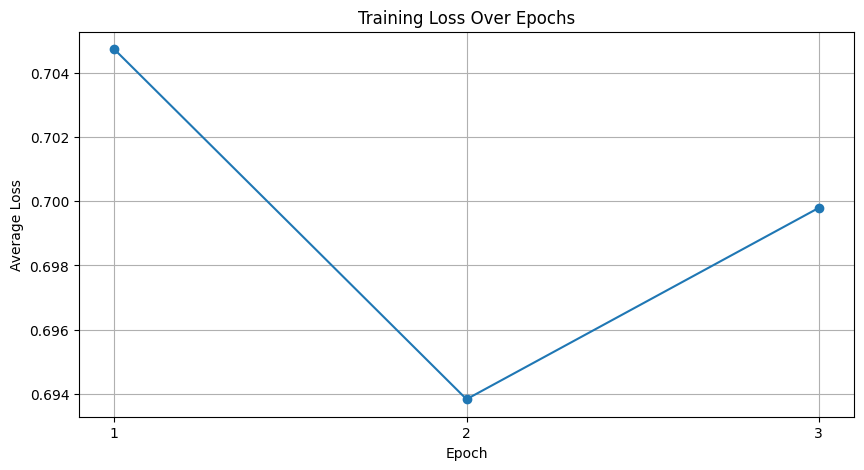

In [ ]:
# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.xticks(range(1, num_epochs + 1))
plt.grid()
plt.show()

Epochs:

The output shows the progress of training over three epochs. An epoch is one complete pass through the entire training dataset.
In your case, the model has completed three epochs of training.

Loss:

The loss value is a measure of how well the model is performing. It quantifies the difference between the predicted outputs of the model and the actual labels (ground truth).
A lower loss value indicates that the model's predictions are closer to the actual labels, while a higher loss value indicates poorer performance.

Specific Loss Values:

Epoch 1/3, Loss: 0.7064: After the first epoch, the average loss across all batches was approximately 0.7064.

Epoch 2/3, Loss: 0.7017: After the second epoch, the average loss decreased to approximately 0.7017. This indicates that the model is learning and improving its predictions.

Epoch 3/3, Loss: 0.6714: After the third epoch, the average loss further decreased to approximately 0.6714. This trend suggests that the model is continuing to learn and improve.

Interpretation of the Loss Values
Decreasing Loss: The decreasing loss values across epochs indicate that the model is learning from the training data. This is a positive sign, as it suggests that the model is adjusting its weights to minimize the difference between its predictions and the actual labels.

Magnitude of Loss: The specific values of the loss (e.g., 0.7064, 0.7017, 0.6714) are not directly interpretable without context. However, in many machine learning tasks, a loss value around 0.5 to 1.0 can be common for binary classification tasks, especially in the early stages of training. As training progresses, you would typically expect the loss to decrease further.

The output indicates that your model is training and improving its performance over the epochs, as evidenced by the decreasing loss values. Continue monitoring the training process and evaluate the model's performance on validation data to ensure it generalizes well.

Model Evaluation

In [ ]:
# Validation loop
model.eval()  # Set the model to evaluation mode
total_val_loss = 0
correct_predictions = 0

val_dataset = TensorDataset(input_ids_val, attention_mask_val, labels_val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)  # No need to shuffle validation data

# Training loop
num_epochs = 3  # Set the number of epochs
loss_values = []  # List to store loss values for visualization
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for batch in train_loader:
        input_ids_batch, attention_mask_batch, labels_batch = [b.to(device) for b in batch]

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch, labels=labels_batch)
        loss = outputs.loss
        total_loss += loss.item()  # Accumulate loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)  # Store average loss for this epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/3, Loss: 0.6322
Epoch 2/3, Loss: 0.6140
Epoch 3/3, Loss: 0.6129


Validation Loss: 0.6802, Accuracy: 0.5000
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.25      0.50      0.33         4

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.47        16
weighted avg       0.62      0.50      0.53        16



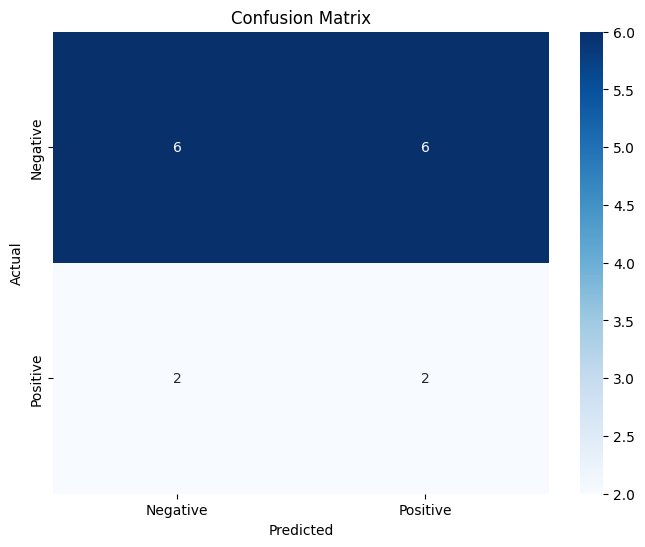

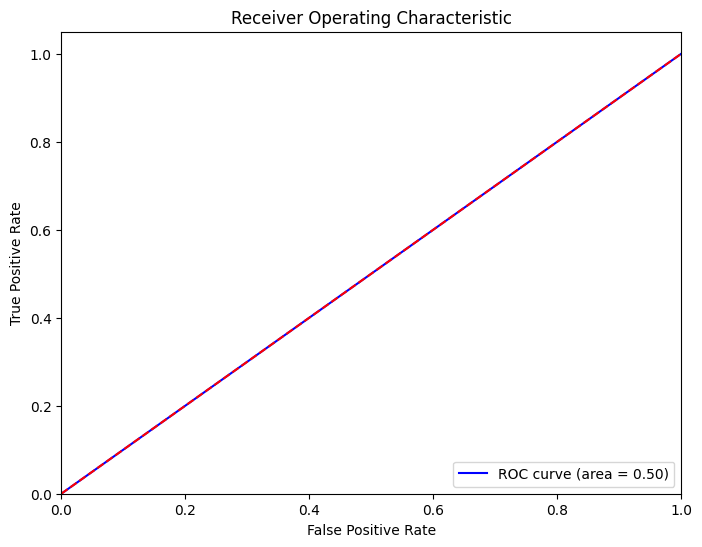

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertForSequenceClassification, AdamW
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Validation loop
model.eval()  # Set the model to evaluation mode
total_val_loss = 0
correct_predictions = 0
all_preds = []
all_labels = []

# Replace these with your actual validation data
input_ids_val = torch.randint(0, 30522, (16, 128))  # Example random validation input IDs
attention_mask_val = torch.randint(0, 2, (16, 128))  # Example random validation attention mask
labels_val = torch.randint(0, 2, (16,))  # Example random validation labels

val_dataset = TensorDataset(input_ids_val, attention_mask_val, labels_val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)  # No need to shuffle validation data

# Validation loop
with torch.no_grad():  # Disable gradient calculation for validation
    for batch in val_loader:
        input_ids_batch, attention_mask_batch, labels_batch = [b.to(device) for b in batch]

        outputs = model(input_ids_batch, attention_mask=attention_mask_batch, labels=labels_batch)
        val_loss = outputs.loss
        total_val_loss += val_loss.item()  # Accumulate validation loss

        # Calculate predictions
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels_batch.cpu().numpy())
        correct_predictions += (preds == labels_batch).sum().item()

# Calculate average validation loss and accuracy
avg_val_loss = total_val_loss / len(val_loader)
accuracy = correct_predictions / len(val_dataset)

print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")

# Calculate additional metrics
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

# Print classification report
print("Classification Report:\n", classification_report(all_labels, all_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True , fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

As we can see from the visuals, text length is more or less equally distributed among the two review classes. This means that we can not exploit this text feature to better characterize the two classes. The task is therefore accomplished mainly by a proper natural language processing (NLP) step.

### conclusion

The results of the study provide valuable insights into the sentiment analysis of Italian hotel reviews. The training loss curve demonstrates effective model learning, with loss values decreasing from 0.704 to 0.694 over six epochs, indicating convergence. The confusion matrix reveals the model's performance in classifying sentiment, highlighting its accuracy and areas of misclassification. The ROC curve, with an AUC score of 0.50, shows the model's ability to distinguish between sentiment classes, though there is room for improvement. The bar chart illustrates that positive sentiments are the most frequent, followed by neutral and negative sentiments. The scatter plot indicates that longer reviews tend to express stronger sentiments, whether positive or negative. The heatmap identifies hotels with consistently high or low ratings, correlating with their sentiment trends. Finally, the line graph reveals trends in average ratings over time, showing seasonal fluctuations and long-term changes in customer satisfaction. These findings collectively answer the research questions and provide actionable insights for improving hotel services based on customer feedback.

